<a href="https://colab.research.google.com/github/keedjk7/Machine-Learning/blob/main/projectWineML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **clean** 

In [290]:
wine_data = pd.read_csv('/content/drive/MyDrive/Colab Data/project/winequality.csv')
wine_data

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
6492                 24.0                  92.0  0.99114  3.27       0.50   
6493                 57.0                 168.0  0.99490  3.15       0.46   
6494                 30.0                 111.0  0.99254  2.99       0.46   
6495                 20.0                 110.0  0.98869  3.34       0.38   
6496                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  good  color  
0         9.4        5     0    red  
1         9.8        5     0    red  
2         9.8        5     0    red  
3         9.8        6     0    red  
4         9.4        5     0    red  
...       ...      ...   ...    ...  
6492     11.2        6     0  white  
6493      9.6        5     0  white  
6494      9.4        6     0  white  
6495     12.8        7     1  white  
6496     11.8        6     0  white  

[6497 rows x 14 columns]

In [291]:
wine_data.shape

(6497, 14)

In [292]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good', 'color'],
      dtype='object')

In [293]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                    object
dtype: object

In [294]:
wine_data_replace = wine_data
set_color = {'red':0,'white':1}
wine_data_replace['color'] = wine_data_replace['color'].replace(set_color)

In [295]:
wine_data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
good                      int64
color                     int64
dtype: object

In [296]:
count_nan = wine_data.isnull().sum()
count_nan

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

In [297]:
wine_data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         good  \
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000   
mean      3.218501     0.531268    10.491801     5.818378     0.196552   
std       0.160787     0.148806     1.192712     0.873255     0.397421   
min       2.720000     0.220000     8.000000     3.000000     0.000000   
25%       3.110000     0.430000     9.500000     5.000000     0.000000   
50%       3.210000     0.510000    10.300000     6.000000     0.000000   
75%       3.320000     0.600000    11.300000     6.000000     0.000000   
max       4.010000     2.000000    14.900000     9.000000     1.000000   

             color  
count  6497.000000  
mean      0.753886  
std       0.430779  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

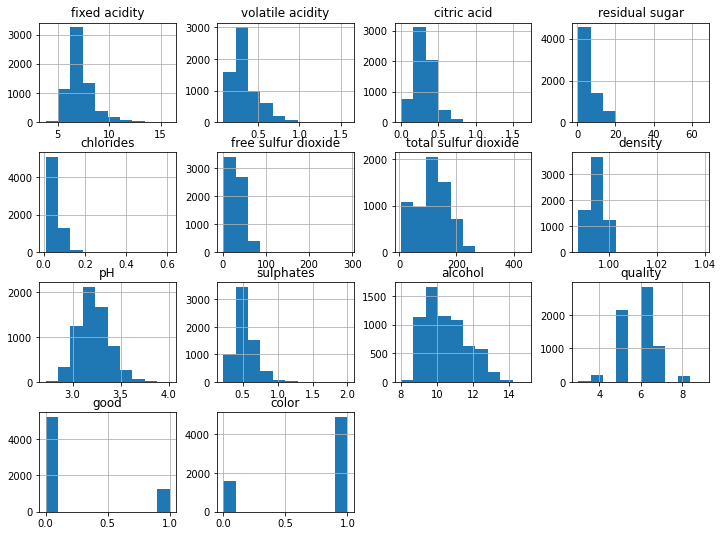

In [298]:
wine_data_replace.hist(figsize=(12,9));

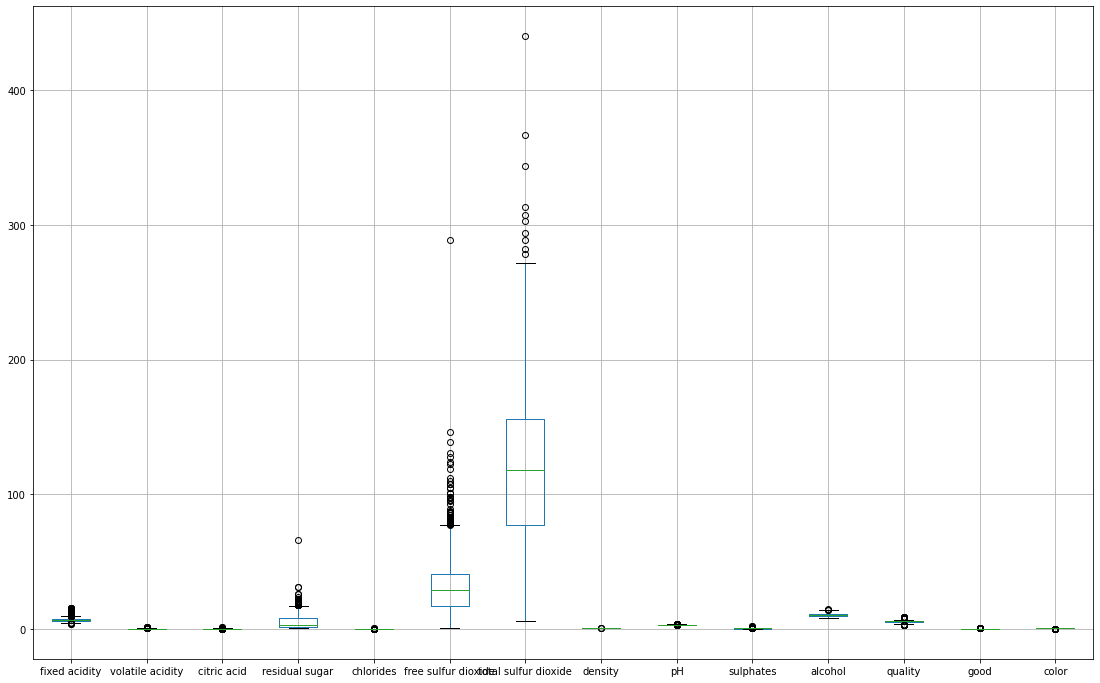

In [299]:
wine_data_replace.boxplot(figsize=(19,12))

In [300]:
# def outlier(df,columnName):
#   Q1 = df[columnName].quantile(0.25)
#   Q3 = df[columnName].quantile(0.75)
#   IQR = Q3 - Q1 
#   lower_bound  = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR
#   ls = df.index[(df[columnName] < lower_bound) | (df[columnName] > upper_bound)]
#   return ls

In [301]:
# def remove(df,ls):
#   ls = sorted(set(ls))
#   df = df.drop(ls)
#   return df

In [302]:
# wine_data_replace.shape

In [303]:
# drop_outlier = []
# for column in wine_data_replace :
#   drop_outlier.extend(outlier(wine_data_replace,column))

In [304]:
# len(drop_outlier)

In [305]:
# wine_data_clean = remove(wine_data_replace,drop_outlier)
# wine_data_clean.shape

In [306]:
# wine_data_clean.boxplot(figsize=(19,12))

# **Check Data** 

In [308]:
white = 0
red = 0
color = wine_data['color']
quality = wine_data['quality']
ColorAndQuality = wine_data[['color','quality']]
wine_data_withoutColor = wine_data.drop(labels = ['color','quality'],axis=1)

In [309]:
for i in color:
  if i == 0:
    red+=1
  elif i== 1:
    white+=1

print('red=',red,'\nwhite=',white)

red= 1599 
white= 4898


In [310]:
colorWineBar = pd.DataFrame([[1,red],[2,white]], columns = ['ColorWine','BottleSample'])

fig = px.bar(colorWineBar,x = 'ColorWine',y = 'BottleSample',color = 'BottleSample', range_y = [0.0,5000])
fig.show()

In [311]:
color.value_counts()

1    4898
0    1599
Name: color, dtype: int64

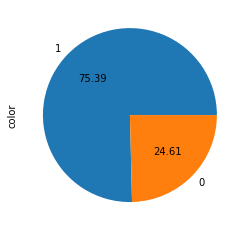

In [312]:
color.value_counts().plot.pie(autopct = '%.2f')

In [313]:
quality_count = [0]*10
for i in quality:
  if i == 1:
    quality_count[0]+=1
  elif i== 2:
    quality_count[1]+=1
  elif i== 3:
    quality_count[2]+=1
  elif i== 4:
    quality_count[3]+=1
  elif i== 5:
    quality_count[4]+=1
  elif i== 6:
    quality_count[5]+=1
  elif i== 7:
    quality_count[6]+=1
  elif i== 8:
    quality_count[7]+=1
  elif i== 9:
    quality_count[8]+=1
  elif i== 10:
    quality_count[9]+=1

print('quality : ',quality_count)

quality :  [0, 0, 30, 216, 2138, 2836, 1079, 193, 5, 0]


In [314]:
temp_quality = [[0 for i in range(2)] for j in range(10)] 
for row in range (10):
  temp_quality[row][0] = row+1
  temp_quality[row][1] = quality_count[row]

temp_quality

[[1, 0],
 [2, 0],
 [3, 30],
 [4, 216],
 [5, 2138],
 [6, 2836],
 [7, 1079],
 [8, 193],
 [9, 5],
 [10, 0]]

In [315]:
temp_quality = [[0 for i in range(2)] for j in range(10)] 
for row in range (10):
  temp_quality[row][0] = row+1
  temp_quality[row][1] = quality_count[row]


qualityWineBar = pd.DataFrame(temp_quality, columns = ['QualityWine','BottleSample'])

fig = px.bar(qualityWineBar,x = 'QualityWine',y = 'BottleSample',color = 'BottleSample', range_y = [0.0,3000])
fig.show()

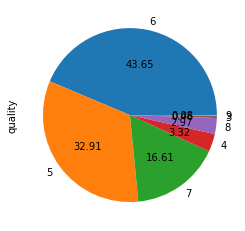

In [316]:
quality.value_counts().plot.pie(autopct = '%.2f')

In [317]:
colorAndQuality = wine_data[['color','quality']]
redQulity = [0]*10
whiteQulity = [0]*10
for ind in colorAndQuality.index:
  # print(colorAndQuality['color'][ind], colorAndQuality['quality'][ind])
  if colorAndQuality['color'][ind] == 'red':
    if colorAndQuality['quality'][ind] == 1:
      redQulity[0]+=1
    elif colorAndQuality['quality'][ind]== 2:
      redQulity[1]+=1
    elif colorAndQuality['quality'][ind]== 3:
      redQulity[2]+=1
    elif colorAndQuality['quality'][ind]== 4:
      redQulity[3]+=1
    elif colorAndQuality['quality'][ind]== 5:
      redQulity[4]+=1
    elif colorAndQuality['quality'][ind]== 6:
      redQulity[5]+=1
    elif colorAndQuality['quality'][ind]== 7:
      redQulity[6]+=1
    elif colorAndQuality['quality'][ind]== 8:
      redQulity[7]+=1
    elif colorAndQuality['quality'][ind]== 9:
      redQulity[8]+=1
    elif colorAndQuality['quality'][ind]== 10:
      redQulity[9]+=1
  elif colorAndQuality['color'][ind] == 'white':
    if colorAndQuality['quality'][ind] == 1:
      whiteQulity[0]+=1
    elif colorAndQuality['quality'][ind]== 2:
      whiteQulity[1]+=1
    elif colorAndQuality['quality'][ind]== 3:
      whiteQulity[2]+=1
    elif colorAndQuality['quality'][ind]== 4:
      whiteQulity[3]+=1
    elif colorAndQuality['quality'][ind]== 5:
      whiteQulity[4]+=1
    elif colorAndQuality['quality'][ind]== 6:
      whiteQulity[5]+=1
    elif colorAndQuality['quality'][ind]== 7:
      whiteQulity[6]+=1
    elif colorAndQuality['quality'][ind]== 8:
      whiteQulity[7]+=1
    elif colorAndQuality['quality'][ind]== 9:
      whiteQulity[8]+=1
    elif colorAndQuality['quality'][ind]== 10:
      whiteQulity[9]+=1

print("redQ",redQulity,"\nwhiteQ",whiteQulity)

redQ [0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 
whiteQ [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [318]:
temp_RedQuality = [[0 for i in range(2)] for j in range(10)] 
for row in range (10):
  temp_RedQuality[row][0] = row+1
  temp_RedQuality[row][1] = redQulity[row]

redWineQuality = pd.DataFrame(temp_RedQuality, columns = ['QualityWine','BottleSample'])

fig = px.bar(redWineQuality,x = 'QualityWine',y = 'BottleSample',color = 'BottleSample', range_y = [0.0,700])
fig.show()

In [319]:
temp_WhiteQuality = [[0 for i in range(2)] for j in range(10)] 
for row in range (10):
  temp_WhiteQuality[row][0] = row+1
  temp_WhiteQuality[row][1] = whiteQulity[row]

whiteWineQuality = pd.DataFrame(temp_WhiteQuality, columns = ['QualityWine','BottleSample'])

fig = px.bar(whiteWineQuality,x = 'QualityWine',y = 'BottleSample',color = 'BottleSample', range_y = [0.0,2300])
fig.show()

#**Imbalance Data**

In [340]:
from imblearn.over_sampling import RandomOverSampler

In [341]:
red_df = wine_data[wine_data['color'] == 'red']
red_df

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, good, color]
Index: []

In [342]:
white_df = wine_data[wine_data['color'] == 'white']
white_df

Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality, good, color]
Index: []

In [343]:
red_df.shape,white_df.shape

((0, 14), (0, 14))

In [344]:
wine_data_withoutColor.shape,color.shape

((6497, 12), (6497,))

In [345]:
#random-over-sampling Color

ROS = RandomOverSampler(random_state = 77)
x_color_ROS,y_color_ROS = ROS.fit_resample(wine_data_withoutColor,color)

In [346]:
y_color_ROS.value_counts()

0    4898
1    4898
Name: color, dtype: int64

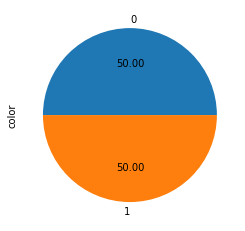

In [347]:
y_color_ROS.value_counts().plot.pie(autopct = '%.2f')

In [348]:
quality

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64

In [349]:
wine_data_withoutColor.shape,y_color_ROS.shape

((6497, 12), (9796,))

In [350]:
quality.shape,x_color_ROS.shape

((6497,), (9796, 12))

In [351]:
quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [352]:
#random-over-sampling Quality
x_quality_ROS,y_quality_ROS = ROS.fit_resample(wine_data_withoutColor,quality)

In [353]:
y_quality_ROS.shape

(19852,)

In [354]:
y_quality_ROS.value_counts()

5    2836
6    2836
7    2836
4    2836
8    2836
3    2836
9    2836
Name: quality, dtype: int64

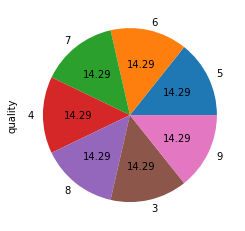

In [355]:
y_quality_ROS.value_counts().plot.pie(autopct = '%.2f')

#**standardize**

##color

In [80]:
wine_data_forScaler_color = x_color_ROS.select_dtypes(exclude=['object'])
standard_scaler = StandardScaler()
wine_data_scaler_color = standard_scaler.fit_transform(wine_data_forScaler_color)

In [81]:
dfWine_AfterScaler_color = pd.DataFrame(data = wine_data_scaler_color, index = wine_data_forScaler_color.index, columns = wine_data_forScaler_color.columns)
dfWine_AfterScaler_color

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.120810          1.551355    -1.812636       -0.612515   0.243720   
1          0.134100          2.492409    -1.812636       -0.445423   0.789272   
2          0.134100          1.865040    -1.571905       -0.517033   0.640485   
3          2.300835         -0.644440     1.557591       -0.612515   0.218922   
4         -0.120810          1.551355    -1.812636       -0.612515   0.243720   
...             ...               ...          ...             ...        ...   
9791      -0.248265         -0.226194     0.955765       -0.564774   0.194125   
9792       0.643920          0.348896    -0.007157       -0.349941   0.243720   
9793       0.197828          0.923985    -0.428436       -0.517033   0.243720   
9794      -0.439447          0.035211     0.053025       -0.588644   0.318114   
9795      -0.375720          0.714861    -1.270992       -0.588644   0.367709   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0               -0.855215             -0.982635  0.843439  1.575333   
1               -0.037601             -0.428632  0.493584 -0.303915   
2               -0.621611             -0.646876  0.563555  0.059810   
3               -0.504809             -0.546148  0.913410 -0.546399   
4               -0.855215             -0.982635  0.843439  1.575333   
...                   ...                   ...       ...       ...   
9791            -0.096002             -0.814755 -0.017205  0.908503   
9792             0.254405              0.712950  0.773468  0.302294   
9793            -0.154403              0.024643  0.514575 -0.243294   
9794            -0.271205             -0.697240  0.451601  1.332849   
9795            -0.913616             -1.284818 -0.209625  1.090366   

      sulphates   alcohol      good  
0     -0.082605 -0.927449 -0.461819  
1      0.642866 -0.580949 -0.461819  
2      0.461498 -0.580949 -0.461819  
3      0.038306 -0.580949 -0.461819  
4     -0.082605 -0.927449 -0.461819  
...         ...       ...       ...  
9791   1.670618  0.458550  2.165348  
9792  -0.263973 -0.927449 -0.461819  
9793   0.038306 -0.840824 -0.461819  
9794  -0.143061 -0.840824 -0.461819  
9795   0.098762  0.891674 -0.461819  

[9796 rows x 12 columns]

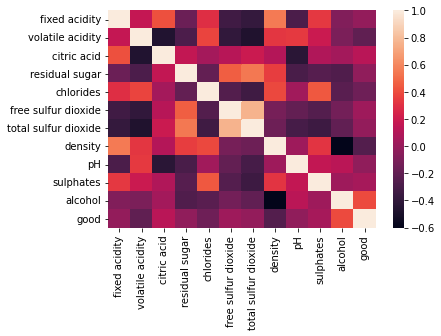

In [82]:
dataCorrColor = dfWine_AfterScaler_color.corr()
sns.heatmap(dataCorrColor)

In [83]:
lower = pd.DataFrame(np.tril(dataCorrColor,-1), columns = dataCorrColor.columns)
lower

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.000000          0.000000     0.000000        0.000000   0.000000   
1        0.168059          0.000000     0.000000        0.000000   0.000000   
2        0.414226         -0.463778     0.000000        0.000000   0.000000   
3       -0.162481         -0.278711     0.162760        0.000000   0.000000   
4        0.297753          0.377723     0.048775       -0.189645   0.000000   
5       -0.330632         -0.392909     0.123552        0.461503  -0.255252   
6       -0.378023         -0.465854     0.194871        0.547030  -0.333869   
7        0.553626          0.326039     0.109188        0.352572   0.386977   
8       -0.286277          0.337181    -0.424257       -0.295239   0.038884   
9        0.335256          0.197737     0.097225       -0.241836   0.441148   
10      -0.078559         -0.096646     0.045289       -0.267644  -0.230977   
11      -0.008869         -0.206527     0.126559       -0.020957  -0.150485   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.000000              0.000000  0.000000  0.000000   0.000000   
1              0.000000              0.000000  0.000000  0.000000   0.000000   
2              0.000000              0.000000  0.000000  0.000000   0.000000   
3              0.000000              0.000000  0.000000  0.000000   0.000000   
4              0.000000              0.000000  0.000000  0.000000   0.000000   
5              0.000000              0.000000  0.000000  0.000000   0.000000   
6              0.765368              0.000000  0.000000  0.000000   0.000000   
7             -0.118418             -0.152767  0.000000  0.000000   0.000000   
8             -0.189897             -0.304881  0.027131  0.000000   0.000000   
9             -0.247912             -0.343861  0.318979  0.162883   0.000000   
10            -0.129937             -0.195933 -0.602467  0.135615   0.026991   
11             0.028871             -0.013990 -0.255166 -0.021087   0.058630   

     alcohol  good  
0   0.000000   0.0  
1   0.000000   0.0  
2   0.000000   0.0  
3   0.000000   0.0  
4   0.000000   0.0  
5   0.000000   0.0  
6   0.000000   0.0  
7   0.000000   0.0  
8   0.000000   0.0  
9   0.000000   0.0  
10  0.000000   0.0  
11  0.393749   0.0

In [356]:
to_drop = [column for column in lower if any(lower[column] > 0.8)]
dfWine_AfterScaler_color.drop(to_drop, inplace=True, axis=1)
dfWine_AfterScaler_color

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.120810          1.551355    -1.812636       -0.612515   0.243720   
1          0.134100          2.492409    -1.812636       -0.445423   0.789272   
2          0.134100          1.865040    -1.571905       -0.517033   0.640485   
3          2.300835         -0.644440     1.557591       -0.612515   0.218922   
4         -0.120810          1.551355    -1.812636       -0.612515   0.243720   
...             ...               ...          ...             ...        ...   
9791      -0.248265         -0.226194     0.955765       -0.564774   0.194125   
9792       0.643920          0.348896    -0.007157       -0.349941   0.243720   
9793       0.197828          0.923985    -0.428436       -0.517033   0.243720   
9794      -0.439447          0.035211     0.053025       -0.588644   0.318114   
9795      -0.375720          0.714861    -1.270992       -0.588644   0.367709   

      total sulfur dioxide   density        pH  sulphates   alcohol      good  
0                -0.982635  0.843439  1.575333  -0.082605 -0.927449 -0.461819  
1                -0.428632  0.493584 -0.303915   0.642866 -0.580949 -0.461819  
2                -0.646876  0.563555  0.059810   0.461498 -0.580949 -0.461819  
3                -0.546148  0.913410 -0.546399   0.038306 -0.580949 -0.461819  
4                -0.982635  0.843439  1.575333  -0.082605 -0.927449 -0.461819  
...                    ...       ...       ...        ...       ...       ...  
9791             -0.814755 -0.017205  0.908503   1.670618  0.458550  2.165348  
9792              0.712950  0.773468  0.302294  -0.263973 -0.927449 -0.461819  
9793              0.024643  0.514575 -0.243294   0.038306 -0.840824 -0.461819  
9794             -0.697240  0.451601  1.332849  -0.143061 -0.840824 -0.461819  
9795             -1.284818 -0.209625  1.090366   0.098762  0.891674 -0.461819  

[9796 rows x 11 columns]

In [357]:
to_drop

[]

##quality

In [86]:
wine_data_forScaler_quality = x_quality_ROS.select_dtypes(exclude=['object'])
standard_scaler = StandardScaler()
wine_data_scaler_quality = standard_scaler.fit_transform(wine_data_forScaler_quality)
wine_data_scaler_quality

array([[ 0.07866042,  1.6317338 , -2.23178863, ...,  0.31250838,
        -1.09149308, -0.8660254 ],
       [ 0.37742478,  2.50471761, -2.23178863, ...,  1.12782977,
        -0.79488537, -0.8660254 ],
       [ 0.37742478,  1.92272841, -1.95336772, ...,  0.92399942,
        -0.79488537, -0.8660254 ],
       ...,
       [-0.14541285, -0.5022266 ,  1.17886755, ..., -0.63869991,
         1.50382442,  1.15470054],
       [ 0.07866042, -0.5992248 ,  0.27399959, ..., -0.23103921,
         1.20721671,  1.15470054],
       [ 1.34840897, -0.4537275 ,  0.90044664, ..., -0.36692611,
        -0.34997379,  1.15470054]])

In [87]:
dfWine_AfterScaler_quality = pd.DataFrame(data = wine_data_scaler_quality, index = wine_data_forScaler_quality.index, columns = wine_data_forScaler_quality.columns)
dfWine_AfterScaler_quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0.078660          1.631734    -2.231789       -0.714367   
1           0.377425          2.504718    -2.231789       -0.552501   
2           0.377425          1.922728    -1.953368       -0.621872   
3           2.916922         -0.405228     1.666104       -0.714367   
4           0.078660          1.631734    -2.231789       -0.714367   
...              ...               ...          ...             ...   
19847       0.078660         -0.599225     0.274000       -0.691244   
19848      -0.145413         -0.502227     1.178868       -0.644996   
19849      -0.145413         -0.502227     1.178868       -0.644996   
19850       0.078660         -0.599225     0.274000       -0.691244   
19851       1.348409         -0.453728     0.900447        1.297407   

       chlorides  free sulfur dioxide  total sulfur dioxide   density  \
0       0.585206            -0.746031             -1.304884  1.191215   
1       1.136822            -0.236040             -0.772783  0.877931   
2       0.986381            -0.600319             -0.982398  0.940588   
3       0.560133            -0.527463             -0.885653  1.253872   
4       0.585206            -0.746031             -1.304884  1.191215   
...          ...                  ...                   ...       ...   
19847  -0.543097            -0.163184              0.388165 -1.080097   
19848  -0.518024            -0.017473             -0.031066 -1.158418   
19849  -0.518024            -0.017473             -0.031066 -1.158418   
19850  -0.543097            -0.163184              0.388165 -1.080097   
19851  -0.442804            -0.126756              0.146301  0.940588   

             pH  sulphates   alcohol      good  
0      1.626523   0.312508 -1.091493 -0.866025  
1     -0.238228   1.127830 -0.794885 -0.866025  
2      0.122691   0.923999 -0.794885 -0.866025  
3     -0.478842   0.448395 -0.794885 -0.866025  
4      1.626523   0.312508 -1.091493 -0.866025  
...         ...        ...       ...       ...  
19847  0.242998  -0.231039  1.207217  1.154701  
19848  0.784377  -0.638700  1.503824  1.154701  
19849  0.784377  -0.638700  1.503824  1.154701  
19850  0.242998  -0.231039  1.207217  1.154701  
19851 -0.238228  -0.366926 -0.349974  1.154701  

[19852 rows x 12 columns]

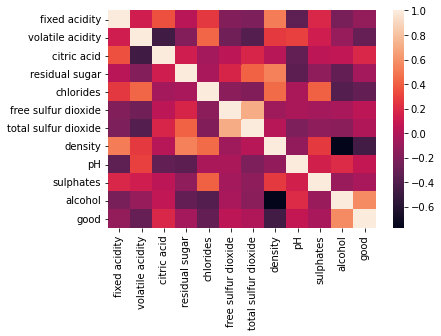

In [88]:
dataCorrQuality = dfWine_AfterScaler_quality.corr()
sns.heatmap(dataCorrQuality)

In [89]:
lower = pd.DataFrame(np.tril(dataCorrQuality,-1), columns = dataCorrQuality.columns)
lower

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.000000          0.000000     0.000000        0.000000   0.000000   
1        0.132479          0.000000     0.000000        0.000000   0.000000   
2        0.354100         -0.475513     0.000000        0.000000   0.000000   
3        0.029927         -0.178587     0.127480        0.000000   0.000000   
4        0.260053          0.425622    -0.052011       -0.034108   0.000000   
5       -0.187762         -0.255075     0.048157        0.170462  -0.146332   
6       -0.211595         -0.385693     0.176582        0.413276  -0.198196   
7        0.514974          0.267313     0.023612        0.530459   0.451012   
8       -0.343203          0.293512    -0.324832       -0.348775  -0.028407   
9        0.189159          0.128584     0.045388       -0.132184   0.406709   
10      -0.230701         -0.103051     0.065797       -0.322340  -0.382381   
11      -0.120891         -0.304113     0.187879       -0.049822  -0.323380   

    free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0              0.000000              0.000000  0.000000  0.000000   0.000000   
1              0.000000              0.000000  0.000000  0.000000   0.000000   
2              0.000000              0.000000  0.000000  0.000000   0.000000   
3              0.000000              0.000000  0.000000  0.000000   0.000000   
4              0.000000              0.000000  0.000000  0.000000   0.000000   
5              0.000000              0.000000  0.000000  0.000000   0.000000   
6              0.712378              0.000000  0.000000  0.000000   0.000000   
7             -0.068420              0.029688  0.000000  0.000000   0.000000   
8             -0.026341             -0.207902 -0.124934  0.000000   0.000000   
9             -0.057691             -0.142577  0.265941  0.147552   0.000000   
10            -0.036277             -0.160326 -0.774049  0.203571  -0.090963   
11             0.046074             -0.010453 -0.456084  0.074029  -0.038184   

     alcohol  good  
0   0.000000   0.0  
1   0.000000   0.0  
2   0.000000   0.0  
3   0.000000   0.0  
4   0.000000   0.0  
5   0.000000   0.0  
6   0.000000   0.0  
7   0.000000   0.0  
8   0.000000   0.0  
9   0.000000   0.0  
10  0.000000   0.0  
11  0.573101   0.0

In [90]:
to_drop = [column for column in lower if any(abs(lower[column]) > 0.8)]
dfWine_AfterScaler_quality.drop(to_drop, inplace=True, axis=1)
dfWine_AfterScaler_quality

fixed acidity  volatile acidity  citric acid  residual sugar  \
0           0.078660          1.631734    -2.231789       -0.714367   
1           0.377425          2.504718    -2.231789       -0.552501   
2           0.377425          1.922728    -1.953368       -0.621872   
3           2.916922         -0.405228     1.666104       -0.714367   
4           0.078660          1.631734    -2.231789       -0.714367   
...              ...               ...          ...             ...   
19847       0.078660         -0.599225     0.274000       -0.691244   
19848      -0.145413         -0.502227     1.178868       -0.644996   
19849      -0.145413         -0.502227     1.178868       -0.644996   
19850       0.078660         -0.599225     0.274000       -0.691244   
19851       1.348409         -0.453728     0.900447        1.297407   

       chlorides  free sulfur dioxide  total sulfur dioxide        pH  \
0       0.585206            -0.746031             -1.304884  1.626523   
1       1.136822            -0.236040             -0.772783 -0.238228   
2       0.986381            -0.600319             -0.982398  0.122691   
3       0.560133            -0.527463             -0.885653 -0.478842   
4       0.585206            -0.746031             -1.304884  1.626523   
...          ...                  ...                   ...       ...   
19847  -0.543097            -0.163184              0.388165  0.242998   
19848  -0.518024            -0.017473             -0.031066  0.784377   
19849  -0.518024            -0.017473             -0.031066  0.784377   
19850  -0.543097            -0.163184              0.388165  0.242998   
19851  -0.442804            -0.126756              0.146301 -0.238228   

       sulphates   alcohol      good  
0       0.312508 -1.091493 -0.866025  
1       1.127830 -0.794885 -0.866025  
2       0.923999 -0.794885 -0.866025  
3       0.448395 -0.794885 -0.866025  
4       0.312508 -1.091493 -0.866025  
...          ...       ...       ...  
19847  -0.231039  1.207217  1.154701  
19848  -0.638700  1.503824  1.154701  
19849  -0.638700  1.503824  1.154701  
19850  -0.231039  1.207217  1.154701  
19851  -0.366926 -0.349974  1.154701  

[19852 rows x 11 columns]

In [91]:
to_drop

['density']

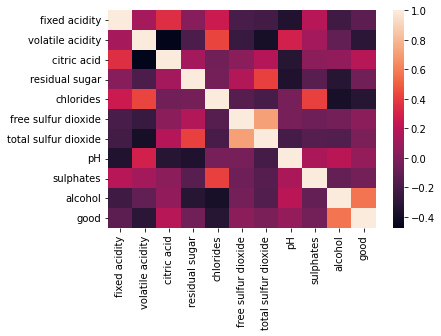

In [92]:
dataCorrQuality_new = dfWine_AfterScaler_quality.corr()
sns.heatmap(dataCorrQuality_new)

#**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
set_color = {'red':0,'white':1}
y_color = y_color_ROS.replace(set_color)
y_color

0       0
1       0
2       0
3       0
4       0
       ..
9791    0
9792    0
9793    0
9794    0
9795    0
Name: color, Length: 9796, dtype: int64

In [ ]:
Rseed = 777
x_train_set_color, x_test_color, y_train_set_color, y_test_color = train_test_split(dfWine_AfterScaler_color, y_color, test_size = 0.3, random_state = Rseed)
x_train_color, x_validate_color, y_train_color, y_validate_color = train_test_split(x_train_set_color, y_train_set_color, test_size = 0.3, random_state = Rseed)

In [ ]:
Rseed = 777
x_train_set_quality, x_test_quality, y_train_set_quality, y_test_quality = train_test_split(dfWine_AfterScaler_quality, y_quality_ROS, test_size = 0.3, random_state = Rseed)
x_train_quality, x_validate_quality, y_train_quality, y_validate_quality = train_test_split(x_train_set_quality, y_train_set_quality, test_size = 0.3, random_state = Rseed)

#**Train**

## Linear Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# pca = PCA()
# X_pca = pca.fit_transform(dfWine_AfterScaler)
# X_pca

In [ ]:
# dfWine_AfterScaler.shape

In [ ]:
# plt.bar(range(1,13),pca.explained_variance_ratio_)
# plt.show()

In [ ]:
# pca1 = PCA(n_components=2)
# X_pca1 = pca1.fit_transform(dfWine_AfterScaler)
# print('Explained Variance ratio = ', pca1.explained_variance_ratio_)
# print('Explained Variance (eigenvalues) = ', pca1.explained_variance_)
# print('--------------------------------------------')
# print('PCA components (eigenvectors) ')
# print(pca1.components_[0:2,:])

###predict wine color

In [ ]:
# dfWine_AfterScaler_color.dtypes

In [ ]:
# lr = LinearRegression()
# # Train
# lr.fit(x_train_color, y_train_color)
# # Validate
# y_pred_lr = lr.predict(x_validate_color)
# # Test
# y_test_pred_lr = lr.predict(x_test_color)

In [ ]:
# x_train_set_color.shape

In [ ]:
# dfWine_AfterScaler_color.columns

In [ ]:
# y_pred_lr,y_validate_color

In [ ]:
# # Measure Accuracy Validation and Test
# # print(r2_score(y_pred_lr, y_validate),'\n',r2_score(y_test_pred_lr, y_test))
# r2_score(y_pred_lr, y_validate_color)

In [ ]:
# dfWine_AfterScaler_color.shape

In [ ]:
# x_n_component = [2,3,4,5,6,7]
# for i in range(6):
#   Pca = PCA(n_components= i+2)
#   X_Pca = Pca.fit_transform(dfWine_AfterScaler_color)
#   x_n_component[i] = X_Pca

# r2accvalid = [0,2,3,4,5,6,7]
# r2accvalid[0] = r2_score(y_pred_lr, y_validate_color)
# r2acctest = [0,2,3,4,5,6,7]
# r2acctest[0] = r2_score(y_test_pred_lr, y_test_color)

In [ ]:
# x_n_component[0].shape

In [ ]:
# for i in range (6):
#     x_train_set_color_r2, x_test_color_r2, y_train_set_color_r2, y_test_color_r2 = train_test_split(x_n_component[i], y_color, test_size = 0.3, random_state = Rseed )
#     x_train_color_r2, x_validate_color_r2, y_train_color_r2, y_validate_color_r2 = train_test_split(x_train_set_color_r2, y_train_set_color_r2, test_size = 0.3, random_state = Rseed)

#     # train
#     lr.fit(x_train_color_r2, y_train_color_r2)
#     # validate
#     y_pred_lr = lr.predict(x_validate_color_r2)
#     # test
#     y_test_pred_lr = lr.predict(x_test_color_r2)
#     # Measure Accuracy Validation and Test
#     r2accvalid[i+1] = r2_score(y_pred_lr, y_validate_color_r2)
#     r2acctest[i+1] = r2_score(y_test_pred_lr, y_test_color_r2)
# plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],r2accvalid)
# plt.plot(r2acctest,color= 'r')
# plt.show()

In [ ]:
# msevalid = [0,5,10,15,20,25,30]
# msevalid[0] = mean_squared_error(y_pred_lr, y_validate_color)
# msetest = [0,5,10,15,20,25,30]
# msetest[0] = mean_squared_error(y_test_pred_lr, y_test_color)

In [ ]:
# for i in range (6):
#     x_train_set_color_mse, x_test_color_mse, y_train_set_color_mse, y_test_color_mse = train_test_split(x_n_component[i], y, test_size = 0.3, random_state = Rseed )
#     x_train_color_mse, x_validate_color_mse, y_train_color_mse, y_validate_color_mse = train_test_split(x_train_set_color_mse, y_train_set_color_mse, test_size = 0.3, random_state = Rseed)

#     # train
#     lr.fit(x_train_color_mse, y_train_color_mse)
#     # validate
#     y_pred_lr = lr.predict(x_validate_color_mse)
#     # test
#     y_test_pred_lr = lr.predict(x_test_color_mse)
#     # Measure Accuracy Validation and Test
#     msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate_color_mse)
#     msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test_color_mse)
# plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],msevalid)
# plt.plot(msetest,color= 'r')
# plt.show()

In [ ]:
# plt.bar(range(1,3), pca1.explained_variance_ratio_)
# plt.show()

###predict wine quality

In [ ]:
# lr = LinearRegression()
# # Train
# lr.fit(x_train_quality, y_train_quality)
# # Validate
# y_pred_lr = lr.predict(x_validate_quality)
# # Test
# y_test_pred_lr = lr.predict(x_test_quality)

In [ ]:
# y_test_pred_lr

In [ ]:
# # Measure Accuracy Validation and Test
# print(r2_score(y_pred_lr, y_validate_quality),'\n',r2_score(y_test_pred_lr, y_test_quality))

In [ ]:
# x_n_component = [2,3,4,5,6,7]
# for i in range(6):
#   Pca = PCA(n_components= i+2)
#   X_Pca = Pca.fit_transform(dfWine_AfterScaler_quality)
#   x_n_component[i] = X_Pca

# r2accvalid = [0,2,3,4,5,6,7]
# r2accvalid[0] = r2_score(y_pred_lr, y_validate_quality)
# r2acctest = [0,2,3,4,5,6,7]
# r2acctest[0] = r2_score(y_test_pred_lr, y_test_quality)

In [ ]:
# for i in range (6):
#     x_train_set_quality_r2, x_test_quality_r2, y_train_set_quality_r2, y_test_quality_r2 = train_test_split(x_n_component[i], color, test_size = 0.3, random_state = Rseed )
#     x_train_quality_r2, x_validate_quality_r2, y_train_quality_r2, y_validate_quality_r2 = train_test_split(x_train_set_quality_r2, y_train_set_quality_r2, test_size = 0.3, random_state = Rseed)

#     # train
#     lr.fit(x_train_quality_r2, y_train_quality_r2)
#     # validate
#     y_pred_lr = lr.predict(x_validate_quality_r2)
#     # test
#     y_test_pred_lr = lr.predict(x_test_quality_r2)
#     # Measure Accuracy Validation and Test
#     r2accvalid[i+1] = r2_score(y_pred_lr, y_validate_quality_r2)
#     r2acctest[i+1] = r2_score(y_test_pred_lr, y_test_quality_r2)
# plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],r2accvalid)
# plt.plot(r2acctest,color= 'r')
# plt.show()

In [ ]:
# msevalid = [0,5,10,15,20,25,30]
# msevalid[0] = mean_squared_error(y_pred_lr, y_validate_quality)
# msetest = [0,5,10,15,20,25,30]
# msetest[0] = mean_squared_error(y_test_pred_lr, y_test_quality)

In [ ]:
# for i in range (6):
#     x_train_set_quality_mse, x_test_quality_mse, y_train_set_quality_mse, y_test_quality_mse = train_test_split(x_n_component[i], color, test_size = 0.3, random_state = Rseed )
#     x_train_quality_mse, x_validate_quality_mse, y_train_quality_mse, y_validate_quality_mse = train_test_split(x_train_set_quality_mse, y_train_set_quality_mse, test_size = 0.3, random_state = Rseed)

#     # train
#     lr.fit(x_train_quality_mse, y_train_quality_mse)
#     # validate
#     y_pred_lr = lr.predict(x_validate_quality_mse)
#     # test
#     y_test_pred_lr = lr.predict(x_test_quality_mse)
#     # Measure Accuracy Validation and Test
#     msevalid[i+1] = mean_squared_error(y_pred_lr, y_validate_quality_mse)
#     msetest[i+1] = mean_squared_error(y_test_pred_lr, y_test_quality_mse)
# plt.bar(["NO_PCA","PCA_2","PCA_3","PCA_4","PCA_5","PCA_6","PCA_7"],msevalid)
# plt.plot(msetest,color= 'r')
# plt.show()

##Support Vector Regression

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics, model_selection

###predict wine color

In [ ]:
# Num_fold = 3
# Seed = 777
# gamma=0.01
# degree=2
# kfold = model_selection.KFold(n_splits= Num_fold, shuffle = True, random_state = Seed)

In [ ]:
# # Model selection

# c_val1 = 0.1
# svr_lin1 = SVR(kernel='linear', C=c_val1)
# svr_rbf1 = SVR(kernel='rbf', C=c_val1, gamma=gamma)
# svr_poly1 = SVR(kernel='poly', C=c_val1, degree=degree)

# # Calculate accuracy score for each model
# score_lin1 = model_selection.cross_val_score(svr_lin1, x_train_color, y_train_color, cv=kfold)
# score_rbf1 = model_selection.cross_val_score(svr_rbf1, x_train_color, y_train_color, cv=kfold)
# score_poly1 = model_selection.cross_val_score(svr_poly1, x_train_color, y_train_color, cv=kfold)

# # View score k-fold
# # Valication score comparison
# score1 = pd.DataFrame({'SVR_linear':score_lin1, 'SVR_rbf': score_rbf1, 'SVR_poly':
# score_poly1})
# score_mean1 = pd.DataFrame({'AVG SVR_linear':[score_lin1.mean()],
# 'AVG SVR_rbf': [score_rbf1.mean()], 'AVG SVC_poly': [score_poly1.mean()]})


In [ ]:
# score1

In [ ]:
# score1['SVR_linear'][0]

In [ ]:
# graphX = ["0.1_SVR_L1","0.1_SVR_rbf1","0.1_SVR_poly1","0.1_SVR_L2","0.1_SVR_rbf2","0.1_SVR_poly2","0.1_SVR_L3","0.1_SVR_rbf3","0.1_SVR_poly3"]
# graphY = []

# for i in range(3):
#   graphY.append(score1['SVR_linear'][i])
#   graphY.append(score1['SVR_rbf'][i])
#   graphY.append(score1['SVR_poly'][i])

In [ ]:
# graphY

In [ ]:
# ax = plt.subplot()
# plt.bar(graphX,graphY)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# SVR_Linear1_pred = svr_lin1.fit (x_train_color, y_train_color).predict(x_test_color)
# SVR_RBF1_pred = svr_rbf1.fit(x_train_color, y_train_color).predict(x_test_color)
# SVR_Poly1_pred = svr_poly1.fit(x_train_color, y_train_color).predict(x_test_color)

In [ ]:
# x_test_color.shape,SVR_Linear1_pred.shape

In [ ]:
# plt.scatter(x_test_color.index, SVR_Linear1_pred, c = 'black')

In [ ]:
# plt.scatter(x_test_color.index, SVR_RBF1_pred, c = 'black')

In [ ]:
# plt.scatter(x_test_color.index, SVR_Poly1_pred, c = 'black')

In [ ]:
# R2 = []
# MSE = []

# #SVR_linear1
# # MSE
# SVR_L1_MSE = metrics.mean_squared_error(y_test_color, SVR_Linear1_pred)
# MSE.append(SVR_L1_MSE)
# # R2
# SVR_L1_r2 = metrics.r2_score(y_test_color, SVR_Linear1_pred)
# R2.append(SVR_L1_r2)

# #SVR_rbf1
# # MSE
# SVR_rbf1_MSE = metrics.mean_squared_error(y_test_color, SVR_RBF1_pred)
# MSE.append(SVR_rbf1_MSE)
# # R2
# SVR_rbf1_r2 = metrics.r2_score(y_test_color, SVR_RBF1_pred)
# R2.append(SVR_rbf1_r2)

# #SVR_poly1
# # MSE
# SVR_Poly1_MSE = metrics.mean_squared_error(y_test_color, SVR_Poly1_pred)
# MSE.append(SVR_Poly1_MSE)
# # R2
# SVR_Poly1_r2 = metrics.r2_score(y_test_color, SVR_Poly1_pred)
# R2.append(SVR_Poly1_r2)

In [ ]:
# X_pred = ['SVR_L1','SVR_rbf1','SVR_Poly1']
# ax = plt.subplot()
# plt.bar(X_pred,R2)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# ax = plt.subplot()
# plt.bar(X_pred,MSE)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# pd.DataFrame({'Model':X_pred,'R2':R2,'MSE':MSE})

###predict wine quality

In [ ]:
# # Calculate accuracy score for each model
# score_lin1 = model_selection.cross_val_score(svr_lin1, x_train_quality, y_train_quality, cv=kfold)
# score_rbf1 = model_selection.cross_val_score(svr_rbf1, x_train_quality, y_train_quality, cv=kfold)
# score_poly1 = model_selection.cross_val_score(svr_poly1, x_train_quality, y_train_quality, cv=kfold)

# # View score k-fold
# # Valication score comparison
# score1 = pd.DataFrame({'SVR_linear':score_lin1, 'SVR_rbf': score_rbf1, 'SVR_poly':
# score_poly1})
# score_mean1 = pd.DataFrame({'AVG SVR_linear':[score_lin1.mean()],
# 'AVG SVR_rbf': [score_rbf1.mean()], 'AVG SVC_poly': [score_poly1.mean()]})

In [ ]:
# score1

In [ ]:
# graphX = ["0.1_SVR_L1","0.1_SVR_rbf1","0.1_SVR_poly1","0.1_SVR_L2","0.1_SVR_rbf2","0.1_SVR_poly2","0.1_SVR_L3","0.1_SVR_rbf3","0.1_SVR_poly3"]
# graphY = []

# for i in range(3):
#   graphY.append(score1['SVR_linear'][i])
#   graphY.append(score1['SVR_rbf'][i])
#   graphY.append(score1['SVR_poly'][i])

In [ ]:
# ax = plt.subplot()
# plt.bar(graphX,graphY)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# SVR_Linear1_pred = svr_lin1.fit (x_train_quality, y_train_quality).predict(x_test_quality)
# SVR_RBF1_pred = svr_rbf1.fit(x_train_quality, y_train_quality).predict(x_test_quality)
# SVR_Poly1_pred = svr_poly1.fit(x_train_quality, y_train_quality).predict(x_test_quality)

In [ ]:
# plt.scatter(x_test_quality.index, SVR_Linear1_pred, c = 'black')

In [ ]:
# plt.scatter(x_test_quality.index, SVR_RBF1_pred, c = 'black')

In [ ]:
# plt.scatter(x_test_quality.index, SVR_Poly1_pred, c = 'black')

In [ ]:
# R2 = []
# MSE = []

# #SVR_linear1
# # MSE
# SVR_L1_MSE = metrics.mean_squared_error(y_test_quality, SVR_Linear1_pred)
# MSE.append(SVR_L1_MSE)
# # R2
# SVR_L1_r2 = metrics.r2_score(y_test_quality, SVR_Linear1_pred)
# R2.append(SVR_L1_r2)

# #SVR_rbf1
# # MSE
# SVR_rbf1_MSE = metrics.mean_squared_error(y_test_quality, SVR_RBF1_pred)
# MSE.append(SVR_rbf1_MSE)
# # R2
# SVR_rbf1_r2 = metrics.r2_score(y_test_quality, SVR_RBF1_pred)
# R2.append(SVR_rbf1_r2)

# #SVR_poly1
# # MSE
# SVR_Poly1_MSE = metrics.mean_squared_error(y_test_quality, SVR_Poly1_pred)
# MSE.append(SVR_Poly1_MSE)
# # R2
# SVR_Poly1_r2 = metrics.r2_score(y_test_quality, SVR_Poly1_pred)
# R2.append(SVR_Poly1_r2)

In [ ]:
# X_pred = ['SVR_L1','SVR_rbf1','SVR_Poly1']
# ax = plt.subplot()
# plt.bar(X_pred,R2)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# ax = plt.subplot()
# plt.bar(X_pred,MSE)
# plt.setp(ax.get_xticklabels(), rotation = 50, ha='right')
# plt.show()

In [ ]:
# pd.DataFrame({'Model':X_pred,'R2':R2,'MSE':MSE})

##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

###predict wine color

In [ ]:
k = [2] #2 color

KNNScoreTemp = []

for i in k:
  modelKNNColor = KNeighborsClassifier(n_neighbors=i, p=2)
  modelKNNColor.fit(x_train_color,y_train_color)
  y_pred= modelKNNColor.predict(x_test_color)
  KNNScore = accuracy_score(y_test_color, y_pred)
  KNNScoreTemp.append(KNNScore)

KNNScoreShow = pd.DataFrame({'k':k, 'KNN_Score':KNNScoreTemp})
KNNScoreShow

k  KNN_Score
0  2   0.991834

In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_color, y_pred))
print('Classification Report: ')
print(classification_report(y_test_color, y_pred))

Confusion Matrix: 
[[1483    2]
 [  22 1432]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1485
           1       1.00      0.98      0.99      1454

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939





```
# This is formatted as code
```

###predict wine quality

In [ ]:
k = [7] # 7 quality

KNNScoreTemp = []

for i in k:
  modelKNNQuality = KNeighborsClassifier(n_neighbors=i, p=2)
  # y_train.astype({'Total.Cup.Points': 'int64'})
  # YforTrain = YforTrain.astype(int)
  modelKNNQuality.fit(x_train_quality,y_train_quality)
  y_pred= modelKNNQuality.predict(x_test_quality)
  KNNScore = accuracy_score(y_test_quality, y_pred)
  KNNScoreTemp.append(KNNScore)

KNNScoreShow = pd.DataFrame({'k':k, 'KNN_Score':KNNScoreTemp})
KNNScoreShow

k  KNN_Score
0  7   0.845534

In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_quality, y_pred))
print('Classification Report: ')
print(classification_report(y_test_quality, y_pred))

Confusion Matrix: 
[[840   0   0   0   0   0   0]
 [  0 841   1   7   0   0   0]
 [ 12 155 477 182   0   0   0]
 [ 18 109 213 542   0   4   0]
 [  0   0   1   0 670 182   4]
 [  0   0   0   0  32 823   0]
 [  0   0   0   0   0   0 843]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.97      1.00      0.98       840
           4       0.76      0.99      0.86       849
           5       0.69      0.58      0.63       826
           6       0.74      0.61      0.67       886
           7       0.95      0.78      0.86       857
           8       0.82      0.96      0.88       855
           9       1.00      1.00      1.00       843

    accuracy                           0.85      5956
   macro avg       0.85      0.85      0.84      5956
weighted avg       0.85      0.85      0.84      5956



##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.pylab import rcParams

###predict wine color

In [ ]:
ASM_function = ['entropy', 'gini'] 
maxDepth = [5, 10, 20, 50, 100, 200]

for i in ASM_function:
    for j in maxDepth:
        ModelDT_color = DecisionTreeClassifier(criterion=i, splitter='best',max_depth = j )
        ModelDT_color.fit(x_train_color,y_train_color)
        # Model Testing
        y_pred_color= ModelDT_color.predict(x_test_color)
        DTScore = accuracy_score(y_test_color, y_pred_color)
        print("criterion = ",i,"max_depth =",j)
        print(DTScore)

criterion =  entropy max_depth = 5
0.983327662470228
criterion =  entropy max_depth = 10
0.9884314392650562
criterion =  entropy max_depth = 20
0.9877509356924123
criterion =  entropy max_depth = 50
0.9877509356924123
criterion =  entropy max_depth = 100
0.9880911874787343
criterion =  entropy max_depth = 200
0.9897924464103437
criterion =  gini max_depth = 5
0.9812861517522967
criterion =  gini max_depth = 10
0.9874106839060905
criterion =  gini max_depth = 20
0.9908132017693093
criterion =  gini max_depth = 50
0.9904729499829874
criterion =  gini max_depth = 100
0.9897924464103437
criterion =  gini max_depth = 200
0.9908132017693093


In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_color, y_pred_color))
print('Classification Report: ')
print(classification_report(y_test_color, y_pred_color))

Confusion Matrix: 
[[1482    3]
 [  24 1430]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1485
           1       1.00      0.98      0.99      1454

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



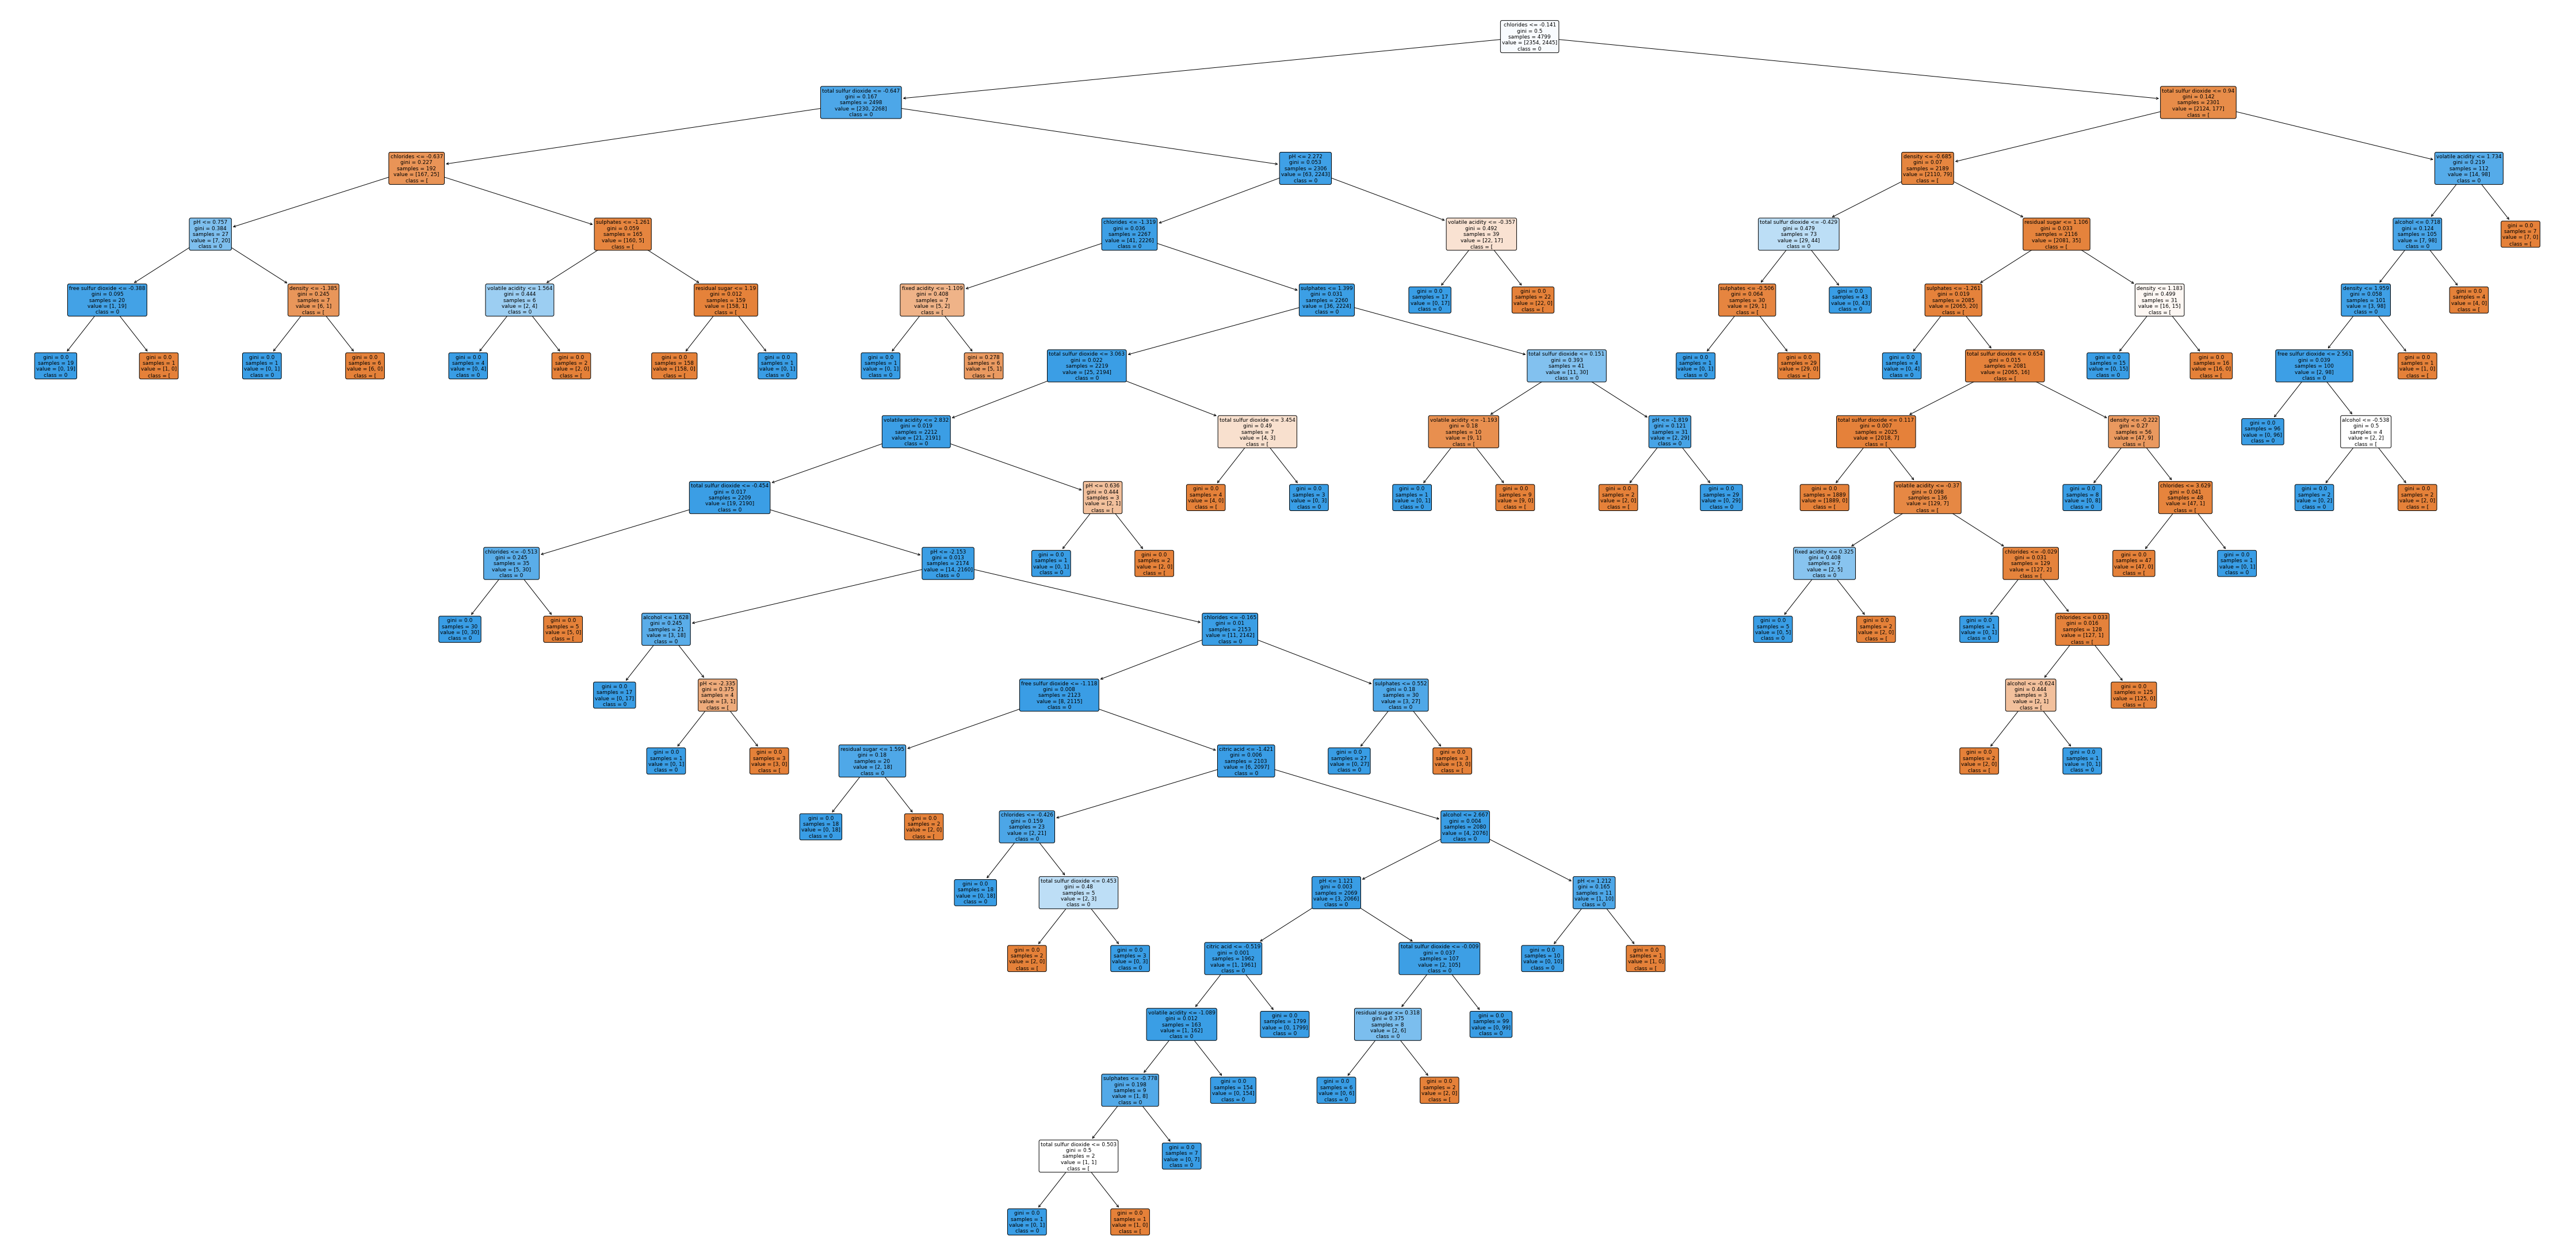

In [ ]:
##set up the parameters
rcParams['figure.figsize'] = 80,40

feature_names = x_train_color.columns
Labels = str(np.unique(y_train_color))
tree.plot_tree( ModelDT_color,

feature_names = feature_names,
class_names = Labels,
rounded = True,
filled = True, fontsize=9)


plt.show()

###predict wine quality

In [ ]:
ASM_function = ['entropy', 'gini'] 
maxDepth = [5, 10, 20, 50, 100, 200]

for i in ASM_function:
    for j in maxDepth:
        ModelDT_quality = DecisionTreeClassifier(criterion=i, splitter='best',max_depth = j )
        ModelDT_quality.fit(x_train_quality,y_train_quality)
        # Model Testing
        y_pred_quality= ModelDT_quality.predict(x_test_quality)
        DTScore = accuracy_score(y_test_quality, y_pred_quality)
        print("criterion = ",i,"max_depth =",j)
        print(DTScore)

criterion =  entropy max_depth = 5
0.6087978509066487
criterion =  entropy max_depth = 10
0.8094358629952989
criterion =  entropy max_depth = 20
0.9058092679650772
criterion =  entropy max_depth = 50
0.9100067159167227
criterion =  entropy max_depth = 100
0.9069845533915379
criterion =  entropy max_depth = 200
0.9061450638012088
criterion =  gini max_depth = 5
0.6052719946272667
criterion =  gini max_depth = 10
0.8038952316991269
criterion =  gini max_depth = 20
0.9039623908663532
criterion =  gini max_depth = 50
0.9039623908663532
criterion =  gini max_depth = 100
0.9066487575554063
criterion =  gini max_depth = 200
0.9089993284083278


In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_quality, y_pred_quality))
print('Classification Report: ')
print(classification_report(y_test_quality, y_pred_quality))

Confusion Matrix: 
[[840   0   0   0   0   0   0]
 [  0 849   0   0   0   0   0]
 [  5  35 589 197   0   0   0]
 [  4  34 247 601   0   0   0]
 [  0   0   0   0 837  20   0]
 [  0   0   0   0   0 855   0]
 [  0   0   0   0   0   0 843]]
Classification Report: 
              precision    recall  f1-score   support

           3       0.99      1.00      0.99       840
           4       0.92      1.00      0.96       849
           5       0.70      0.71      0.71       826
           6       0.75      0.68      0.71       886
           7       1.00      0.98      0.99       857
           8       0.98      1.00      0.99       855
           9       1.00      1.00      1.00       843

    accuracy                           0.91      5956
   macro avg       0.91      0.91      0.91      5956
weighted avg       0.91      0.91      0.91      5956



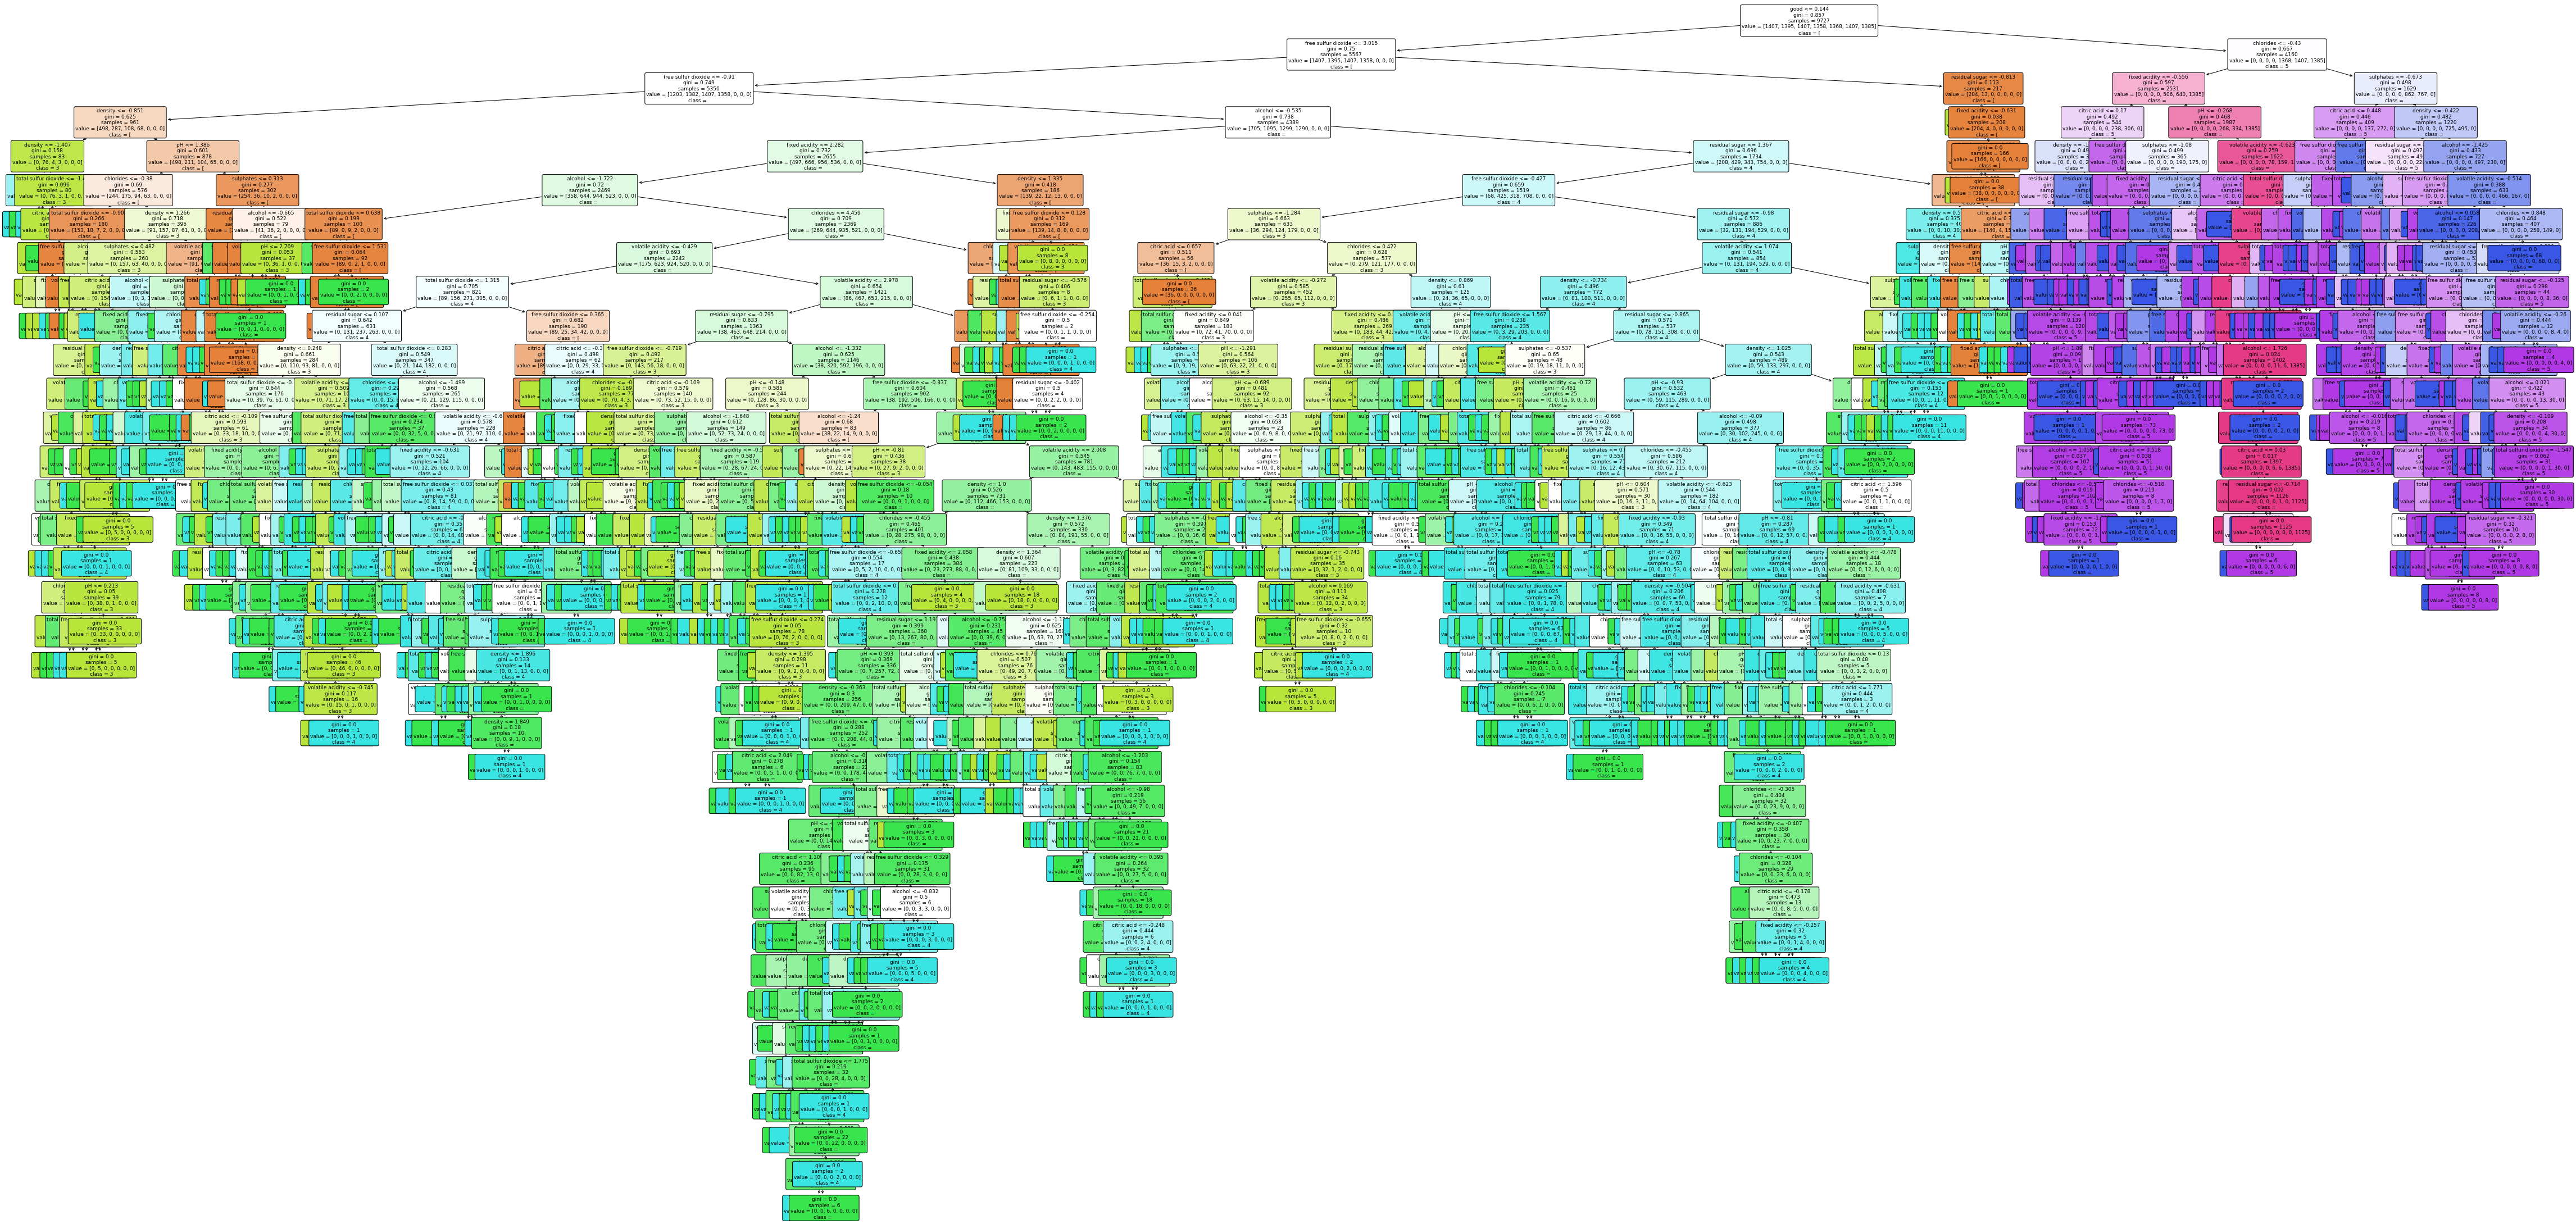

In [ ]:
##set up the parameters
rcParams['figure.figsize'] = 80,40

feature_names = x_train_quality.columns
Labels = str(np.unique(y_train_quality))
tree.plot_tree( ModelDT_quality,

feature_names = feature_names,
class_names = Labels,
rounded = True,
filled = True, fontsize=9)


plt.show()

##Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

###predict wine color

In [ ]:
ASM_function = ['entropy', 'gini'] 
nEstimator = 100 #n descistion tree use
nJob = -1 #parallel
rState = 777 #seed 

RandomF_color = RandomForestClassifier(criterion=ASM_function[0],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF_color.fit(x_train_color,y_train_color)

y_pred= RandomF_color.predict(x_test_color)
RFScore = accuracy_score(y_test_color, y_pred)
print(RFScore)

0.9962572303504593


In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_color, y_pred))
print('Classification Report: ')
print(classification_report(y_test_color, y_pred))

Confusion Matrix: 
[[1482    3]
 [   8 1446]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1485
           1       1.00      0.99      1.00      1454

    accuracy                           1.00      2939
   macro avg       1.00      1.00      1.00      2939
weighted avg       1.00      1.00      1.00      2939



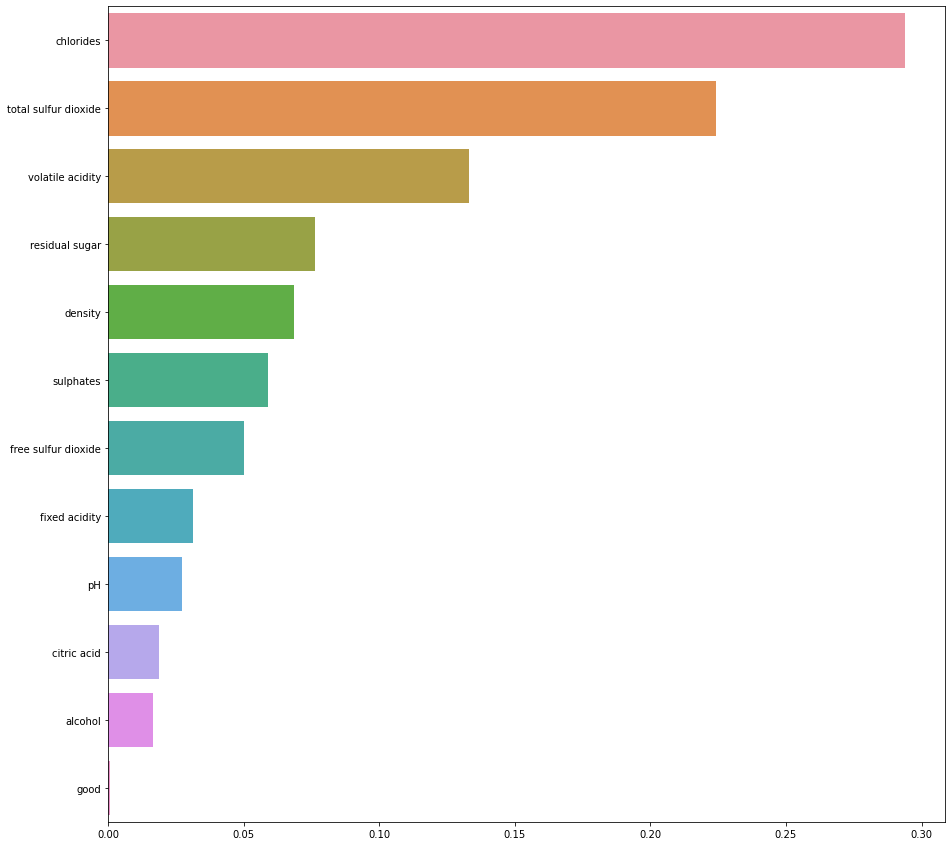

In [ ]:
feature_imp = pd.Series(RandomF_color.feature_importances_, index = feature_names).sort_values(ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)

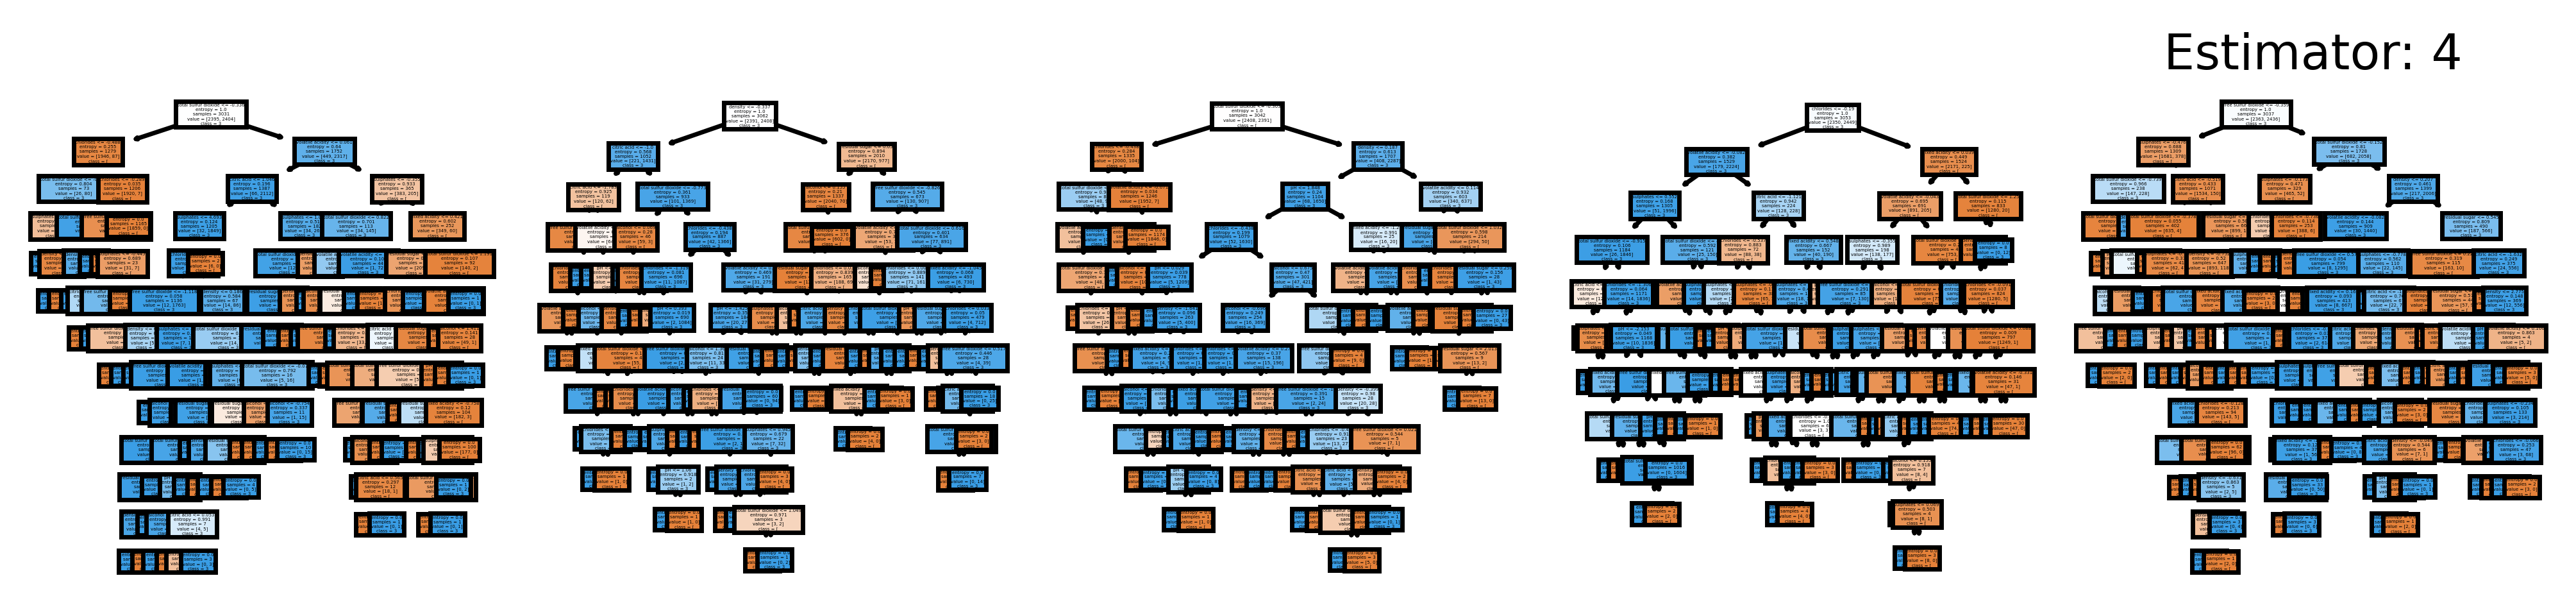

In [ ]:
rcParams['figure.figsize'] = 500,200
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=500)

for index in range(0, 5):
  tree.plot_tree( RandomF_color.estimators_[index],
  feature_names = feature_names,
  class_names= Labels,
  filled = True,
  ax = axes[index]);
axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
plt.show()

###predict wine quality

In [ ]:
RandomF_quality = RandomForestClassifier(criterion=ASM_function[0],n_estimators=nEstimator, n_jobs=nJob, random_state=rState)
RandomF_quality.fit(x_train_quality,y_train_quality)

y_pred= RandomF_quality.predict(x_test_quality)
RFScore = accuracy_score(y_test_quality, y_pred)
print(RFScore)

0.9422431161853593


In [ ]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test_quality, y_pred))
print('Classification Report: ')
print(classification_report(y_test_quality, y_pred))

Confusion Matrix: 
[[840   0   0   0   0   0   0]
 [  0 849   0   0   0   0   0]
 [  3  17 652 154   0   0   0]
 [  0   3 161 722   0   0   0]
 [  0   0   0   0 851   6   0]
 [  0   0   0   0   0 855   0]
 [  0   0   0   0   0   0 843]]
Classification Report: 
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       840
           4       0.98      1.00      0.99       849
           5       0.80      0.79      0.80       826
           6       0.82      0.81      0.82       886
           7       1.00      0.99      1.00       857
           8       0.99      1.00      1.00       855
           9       1.00      1.00      1.00       843

    accuracy                           0.94      5956
   macro avg       0.94      0.94      0.94      5956
weighted avg       0.94      0.94      0.94      5956



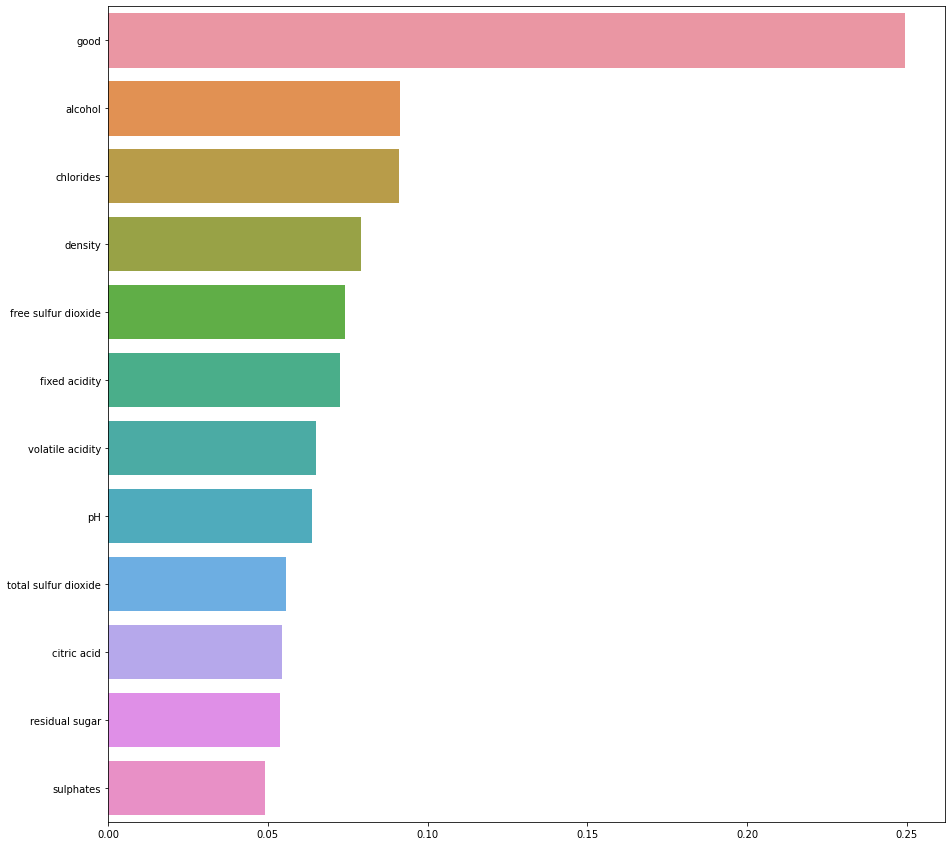

In [ ]:
feature_imp = pd.Series(RandomF_quality.feature_importances_, index = feature_names).sort_values(ascending=False)

plt.figure(figsize=(15,15))
sns.barplot(x=feature_imp, y=feature_imp.index)

##GrideSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

###predict wine color

In [ ]:
classification = { 'KNN': KNeighborsClassifier(), 'DT': DecisionTreeClassifier(), 'RF': RandomForestClassifier() }
K_list_color = [2]
KNN_param_color = dict(n_neighbors=K_list_color)

ASM_function = ['entropy', 'gini']
maxD_color = [ 4, 5, 6]
maxF = ["auto", "log2", None]
minSample = [1, 2, 4]
DT_param_color = dict(criterion=ASM_function, max_depth = maxD_color, min_samples_leaf = minSample, max_features = maxF)

nEst = [10, 30, 50, 100]
RF_param_color = dict(n_estimators = nEst, criterion=ASM_function, max_depth = maxD_color, min_samples_leaf = minSample,
max_features = maxF)

for EST in classification:
    model = classification[EST]
    if (EST == 'KNN'):
        params = KNN_param_color
    elif(EST == 'DT'):
        params = DT_param_color
    else:
        params = RF_param_color
    grid = GridSearchCV( estimator = model,n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = params )
grid_result = grid.fit(x_train_color, y_train_color)

Fitting 2 folds for each of 216 candidates, totalling 432 fits
[CV 1/2; 1/216] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/216] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.980 total time=   0.0s
[CV 2/2; 1/216] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/216] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.987 total time=   0.0s
[CV 1/2; 2/216] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/216] END criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.987 total time=   0.1s
[CV 2/2; 2/216] START criterion=entropy, max_depth=4, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/216] END criterion=entropy, max_depth=4, max_features=auto, min_sample

In [ ]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 50}
Best score:  0.9920815096568014


In [ ]:
mean = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
param = grid_result.cv_results_['params']
bar_mean_entropy = []
bar_mean_gini = []
bar_std_entropy = []
bar_std_gini = []
bar_param_entropy = []
bar_param_gini = []

for mean, stdev, param in zip(mean, std, param):
    # print("%f (%f) with: %r" % (mean, stdev, param))
    if param['criterion'] == 'entropy':
        bar_mean_entropy.append(mean)
        bar_std_entropy.append(stdev)
        bar_param_entropy.append("max_depth : "+ str(param['max_depth']) + ", max_feature : " + str(param['max_features']) + ", min_samples_leaf : " + str(param['min_samples_leaf']) + ", n_estimators : " + str(param['n_estimators']))
    else:
        bar_mean_gini.append(mean)
        bar_std_gini.append(stdev)
        bar_param_gini.append("max_depth : "+ str(param['max_depth']) + ", max_feature : " + str(param['max_features']) + ", min_samples_leaf : " + str(param['min_samples_leaf']) + ", n_estimators : " + str(param['n_estimators']))

In [ ]:
x = np.arange(len(bar_mean_entropy))
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Criterion : entropy')
rect1 = plt.bar(x-w/2,bar_mean_entropy,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_std_entropy,w,color = 'r')
ax.set_xticks(x)
ax.set_xticklabels(bar_param_entropy,rotation = 90)
plt.subplots_adjust(bottom=0.50)
plt.show()

###predict wine quality

In [ ]:
K_list_quality = [9]
KNN_param_quality = dict(n_neighbors=K_list_quality)
maxD_quality = [7, 8, 15, 25, 35]
DT_param_quality = dict(criterion=ASM_function, max_depth = maxD_quality, min_samples_leaf = minSample, max_features = maxF)

nEst = [10, 30, 50, 100]
RF_param_quality = dict(n_estimators = nEst, criterion=ASM_function, max_depth = maxD_quality, min_samples_leaf = minSample,
max_features = maxF)

for EST in classification:
    model = classification[EST]
    if (EST == 'KNN'):
        params = KNN_param_quality
    elif(EST == 'DT'):
        params = DT_param_quality
    else:
        params = RF_param_quality
    grid = GridSearchCV( estimator = model,n_jobs = 1,verbose = 10,scoring = 'accuracy', cv = 2,param_grid = params )
grid_result = grid.fit(x_train_quality, y_train_quality)

Fitting 2 folds for each of 360 candidates, totalling 720 fits
[CV 1/2; 1/360] START criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 1/2; 1/360] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.795 total time=   0.1s
[CV 2/2; 1/360] START criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=10
[CV 2/2; 1/360] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=10;, score=0.786 total time=   0.1s
[CV 1/2; 2/360] START criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 1/2; 2/360] END criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=30;, score=0.806 total time=   0.2s
[CV 2/2; 2/360] START criterion=entropy, max_depth=7, max_features=auto, min_samples_leaf=1, n_estimators=30
[CV 2/2; 2/360] END criterion=entropy, max_depth=7, max_features=auto, min_sample

In [ ]:
print('Best params: ',grid_result.best_params_)
print('Best score: ', grid_result.best_score_)

Best params:  {'criterion': 'entropy', 'max_depth': 35, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 100}
Best score:  0.9122032717850688


In [ ]:
mean = grid_result.cv_results_['mean_test_score']
std = grid_result.cv_results_['std_test_score']
param = grid_result.cv_results_['params']
bar_mean_entropy = []
bar_mean_gini = []
bar_std_entropy = []
bar_std_gini = []
bar_param_entropy = []
bar_param_gini = []

for mean, stdev, param in zip(mean, std, param):
    # print("%f (%f) with: %r" % (mean, stdev, param))
    if param['criterion'] == 'entropy':
        bar_mean_entropy.append(mean)
        bar_std_entropy.append(stdev)
        bar_param_entropy.append("max_depth : "+ str(param['max_depth']) + ", max_feature : " + str(param['max_features']) + ", min_samples_leaf : " + str(param['min_samples_leaf']) + ", n_estimators : " + str(param['n_estimators']))
    else:
        bar_mean_gini.append(mean)
        bar_std_gini.append(stdev)
        bar_param_gini.append("max_depth : "+ str(param['max_depth']) + ", max_feature : " + str(param['max_features']) + ", min_samples_leaf : " + str(param['min_samples_leaf']) + ", n_estimators : " + str(param['n_estimators']))

In [ ]:
x = np.arange(len(bar_mean_entropy))
w = 0.5
fig, ax = plt.subplots()
fig = plt.title('Criterion : entropy')
rect1 = plt.bar(x-w/2,bar_mean_entropy,w,color = 'b')
rect2 = plt.bar(x+w/2,bar_std_entropy,w,color = 'r')
ax.set_xticks(x)
ax.set_xticklabels(bar_param_entropy,rotation = 90)
plt.subplots_adjust(bottom=0.50)
plt.show()

##NN Model

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# ------------ NN Architecture parameter -------------------------------
Hidden_Layer_param = (30, 30, 30)

###predict wine color

In [ ]:
# ------------ Training NN using 1D features -------------------------------
mlp_color = MLPClassifier(hidden_layer_sizes = Hidden_Layer_param)
mlp_color.fit(x_train_color,y_train_color)
mlp_pred_color = mlp_color.predict(x_test_color)

In [ ]:
#View Confusion Matrix and Classification Report
print('Confusion Matrix')
confusion_matrix(y_test_color,mlp_pred_color)

Confusion Matrix


array([[1483,    2],
       [  10, 1444]])

In [ ]:
print('Classification RBF')
print(classification_report(y_test_color,mlp_pred_color))

Classification RBF
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1485
           1       1.00      0.99      1.00      1454

    accuracy                           1.00      2939
   macro avg       1.00      1.00      1.00      2939
weighted avg       1.00      1.00      1.00      2939



###predict wine quality

In [ ]:
# ------------ Training NN using 1D features -------------------------------
mlp_quality = MLPClassifier(hidden_layer_sizes = Hidden_Layer_param)
mlp_quality.fit(x_train_quality,y_train_quality)
mlp_pred_quality = mlp_quality.predict(x_test_quality)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [ ]:
#View Confusion Matrix and Classification Report
print('Confusion Matrix')
confusion_matrix(y_test_quality,mlp_pred_quality)

Confusion Matrix


array([[840,   0,   0,   0,   0,   0,   0],
       [  0, 811,  33,   5,   0,   0,   0],
       [ 11,  86, 550, 177,   1,   1,   0],
       [  8,  63, 250, 565,   0,   0,   0],
       [  0,   0,   0,   0, 811,  44,   2],
       [  0,   0,   0,   0,  47, 808,   0],
       [  0,   0,   0,   0,   0,   0, 843]])

In [ ]:
print('Classification RBF')
print(classification_report(y_test_quality,mlp_pred_quality))

Classification RBF
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       840
           4       0.84      0.96      0.90       849
           5       0.66      0.67      0.66       826
           6       0.76      0.64      0.69       886
           7       0.94      0.95      0.95       857
           8       0.95      0.95      0.95       855
           9       1.00      1.00      1.00       843

    accuracy                           0.88      5956
   macro avg       0.88      0.88      0.88      5956
weighted avg       0.88      0.88      0.88      5956



##CNN Model

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# ------------ CNN Architecture parameter -------------------------------
# Nlayer (CNN, dense), Nnode, Activation
CNN_L1 = 16
CNN_L2 = 64
CNN_L3 = 128
D_L1 = 512
D_out = 6
ActivationArray = ["sigmoid","tanh","relu",]
Activation = "relu"
Ker_size = (3,3)
Pooling_size = (2,1)
slidingW = 100
n_feature = 12
Input_shape = (slidingW, n_feature, 1)

In [ ]:
# ------------ Create CNN Model -------------------------------
model= Sequential()
model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Activation,input_shape=Input_shape,padding='same'))
model.add(MaxPooling2D(pool_size=Pooling_size))
model.add(Dropout(0.4))
model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation= Activation, padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))
model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation= Activation,padding='same'))
model.add(MaxPooling2D(pool_size= Pooling_size))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(D_L1 , activation= Activation ))
model.add(Dense(D_out, activation='sigmoid'))
model.compile(optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 100, 12, 16)       160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 12, 16)       0         
 g2D)                                                            
                                                                 
 dropout_12 (Dropout)        (None, 50, 12, 16)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 50, 12, 64)        9280      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 25, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_13 (Dropout)        (None, 25, 12, 64)       

In [ ]:
# for i in range(len(Activation)):
#   model= Sequential()
#   model.add(Conv2D(CNN_L1, kernel_size=Ker_size, activation=Activation[i],input_shape=Input_shape,padding='same'))
#   model.add(MaxPooling2D(pool_size=Pooling_size))
#   model.add(Dropout(0.4))
#   model.add(Conv2D(CNN_L2, kernel_size=Ker_size, activation= Activation[i], padding='same'))
#   model.add(MaxPooling2D(pool_size= Pooling_size))
#   model.add(Dropout(0.4))
#   model.add(Conv2D(CNN_L3, kernel_size=Ker_size, activation= Activation[i], padding='same'))
#   model.add(MaxPooling2D(pool_size= Pooling_size))
#   model.add(Dropout(0.4))
#   model.add(Flatten())
#   model.add(Dense(D_L1 , activation= Activation ))
#   model.add(Dense(D_out, activation='sigmoid'))
#   model.compile(optimizer='adam', metrics=['accuracy'])
#   model.summary()

In [ ]:
# ------------ Create Optimizer -------------------------------
model.compile(optimizer='adam',
loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=["acc"])

###predict wine color

In [ ]:
#split train test 3d
Stride_step = 5
df_wine_color3D = np.array([],ndmin=2)
df_color_new3D = np.array([])

for t in range(0 , len(dfWine_AfterScaler_color), Stride_step ):
    F3d = np.array(dfWine_AfterScaler_color[t:t+slidingW],ndmin=2)
    if len(F3d) <slidingW:
        break
    F3d.reshape(slidingW, n_feature,1)
    if df_wine_color3D.size == 0 :
        df_wine_color3D = F3d
    else:
        df_wine_color3D = np.dstack((df_wine_color3D,F3d))
    Colors = stats.mode(y_color[t : t+slidingW])
    df_color_new3D = np.append(df_color_new3D,Colors[0])

df_wine_color3D = np.swapaxes(df_wine_color3D,0,2)
df_wine_color3D = np.swapaxes(df_wine_color3D,1,2)
df_wine_color3D = df_wine_color3D[..., np.newaxis]
x3D_train_color, x3D_test_color, y3D_train_color, y3D_test_color = train_test_split( df_wine_color3D , df_color_new3D,test_size = 0.33 ,random_state=2)

In [ ]:
x3D_test_color.shape,y3D_test_color.shape

((641, 100, 12, 1), (641,))

In [ ]:
# ------ Train CNN using 3D feature--------------------------------------------
history = model.fit(x3D_train_color, y3D_train_color, epochs=50, batch_size=64,
validation_data=(x3D_test_color, y3D_test_color))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning:

"`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"



21/21 [==============================] - 13s 548ms/step - loss: 0.6433 - acc: 0.8622 - val_loss: 0.0015 - val_acc: 1.0000
Epoch 2/50
21/21 [==============================] - 14s 680ms/step - loss: 0.0057 - acc: 0.9985 - val_loss: 0.0013 - val_acc: 0.9984
Epoch 3/50
21/21 [==============================] - 12s 582ms/step - loss: 0.0019 - acc: 0.9992 - val_loss: 0.0013 - val_acc: 0.9984
Epoch 4/50
21/21 [==============================] - 11s 521ms/step - loss: 0.0016 - acc: 0.9992 - val_loss: 0.0010 - val_acc: 1.0000
Epoch 5/50
21/21 [==============================] - 13s 632ms/step - loss: 4.0374e-04 - acc: 1.0000 - val_loss: 7.6621e-04 - val_acc: 1.0000
Epoch 6/50
21/21 [==============================] - 11s 513ms/step - loss: 4.0442e-04 - acc: 1.0000 - val_loss: 6.1850e-04 - val_acc: 1.0000
Epoch 7/50
21/21 [==============================] - 11s 507ms/step - loss: 2.7077e-04 - acc: 1.0000 - val_loss: 6.4240e-04 - val_acc: 1.0000
Epoch 8/50
21/21 [==============================] - 11s 

In [ ]:
# ------- Test CNN -------------------------------
CNN_pred_color = model.predict(x3D_test_color)

21/21 [==============================] - 2s 81ms/step


In [ ]:
#View Confusion Matrix and Classification Report
print('Confusion Matrix')
confusion_matrix(y_test_color,mlp_pred_color)

Confusion Matrix


array([[1483,    2],
       [  14, 1440]])

In [ ]:
print('Classification RBF')
print(classification_report(y_test_color,mlp_pred_color))

Classification RBF
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1485
           1       1.00      0.99      0.99      1454

    accuracy                           0.99      2939
   macro avg       0.99      0.99      0.99      2939
weighted avg       0.99      0.99      0.99      2939



###predict wine quality

In [ ]:
#split train test 3d
Stride_step = 5
df_wine_quality3D = np.array([],ndmin=2)
df_quality_new3D = np.array([])

for t in range(0 , len(dfWine_AfterScaler_quality), Stride_step ):
    F3d = np.array(dfWine_AfterScaler_quality[t:t+slidingW],ndmin=2)
    if len(F3d) <slidingW:
        break
    F3d.reshape(slidingW, n_feature,1)
    if df_wine_quality3D.size == 0 :
        df_wine_quality3D = F3d
    else:
        df_wine_quality3D = np.dstack((df_wine_quality3D,F3d))
    Qualitys = stats.mode(y_quality_ROS[t : t+slidingW])
    df_quality_new3D = np.append(df_quality_new3D,Qualitys[0])

df_wine_quality3D = np.swapaxes(df_wine_quality3D,0,2)
df_wine_quality3D = np.swapaxes(df_wine_quality3D,1,2)
df_wine_quality3D = df_wine_quality3D[..., np.newaxis]
x3D_train_quality, x3D_test_quality, y3D_train_quality, y3D_test_quality = train_test_split( df_wine_quality3D , df_quality_new3D,test_size = 0.33 ,random_state=2)

In [ ]:
x3D_test_quality.shape,y3D_test_quality.shape

((1304, 100, 12, 1), (1304,))

In [ ]:
# ------ Train CNN using 3D feature--------------------------------------------
history_quality = model.fit(x3D_train_quality, y3D_train_quality, epochs=50, batch_size=64,
validation_data =(x3D_test_quality, y3D_test_quality))

Epoch 1/50


InvalidArgumentError: ignored

In [ ]:
# ------- Test CNN -------------------------------
CNN_pred_quality = model.predict(x3D_test_color)

In [ ]:
#View Confusion Matrix and Classification Report
print('Confusion Matrix')
confusion_matrix(y_test_color,mlp_pred_quality)

In [ ]:
print('Classification RBF')
print(classification_report(y_test_color,mlp_pred_quality))

##Input for predict color

In [ ]:
wine_data_withoutColor.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'good'],
      dtype='object')

In [ ]:
##Input
# fixed_acidity = input('fixed_acidity: ')
# volatile_acidity = input('volatile_acidity: ')
# citric_acid = input('citric_acid: ')
# residual_sugar = input('residual_sugar: ')
# chlorides = input('chlorides: ')
# free_sulfur_dioxide = input('free_sulfur_dioxide: ')
# total_sulfur_dioxide = input('total_sulfur_dioxide: ')
# density = input('density: ')
# pH = input('pH: ')
# sulphates = input('sulphates: ')
# alcohol = input('alcohol: ')
# good =input('good: ')

# wine_attribute = []
# wine_attribute.append(fixed_acidity)
# wine_attribute.append(volatile_acidity)
# wine_attribute.append(citric_acid)
# wine_attribute.append(residual_sugar)
# wine_attribute.append(chlorides)
# wine_attribute.append(free_sulfur_dioxide)
# wine_attribute.append(total_sulfur_dioxide)
# wine_attribute.append(density)
# wine_attribute.append(pH)
# wine_attribute.append(sulphates)
# wine_attribute.append(alcohol)
# wine_attribute.append(good)

In [ ]:
wine_attribute = [1,1,1,1,1,1,1,1,1,1,1,1]

In [ ]:
print(wine_attribute)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
x_test_color

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6873       0.389010          1.708197    -0.548801       -0.660255   0.194125   
4594      -0.630630         -0.644440     0.233573       -0.875088  -0.723394   
740        0.452738          1.865040    -0.067340       -0.063498   0.218922   
5149      -0.248265         -1.376372     0.113208       -0.803477  -1.095361   
824       -0.311992          0.401176    -0.127523       -0.397682   0.045338   
...             ...               ...          ...             ...        ...   
5760      -0.120810         -1.271810    -0.007157        2.204181  -0.252236   
7863       1.472378         -0.278474     0.654851       -0.517033   0.417305   
27         0.197828          0.139772    -0.548801       -0.684126   0.987654   
9447      -0.120810          1.551355    -1.812636       -0.612515   0.243720   
1651      -0.885540         -1.271810     0.173391       -0.803477  -0.227438   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
6873            -1.205622             -1.335182  0.493584 -0.303915   
4594             0.955217              0.444342 -2.305258 -1.334471   
740             -0.796814             -1.284818  0.388627  1.211607   
5149             1.305624              0.393978 -1.122747 -1.273850   
824             -1.147221             -1.284818  0.500581 -0.061432   
...                   ...                   ...       ...       ...   
5760             0.429608              1.266953  1.000874 -2.122542   
7863            -0.855215             -0.529360  0.983381 -0.243294   
27              -0.913616             -0.932271  0.423613 -0.485778   
9447            -0.855215             -0.982635  0.843439  1.575333   
1651            -0.271205             -0.176813 -1.535576  0.423536   

      sulphates   alcohol      good  
6873  -0.324429 -0.840824 -0.461819  
4594  -1.231269  1.757923 -0.461819  
740    0.642866  0.891674 -0.461819  
5149   0.582410 -0.407700 -0.461819  
824   -0.263973 -0.147825 -0.461819  
...         ...       ...       ...  
5760  -0.808077 -1.533823  2.165348  
7863  -0.445341 -0.840824 -0.461819  
27     2.033353 -0.840824 -0.461819  
9447  -0.082605 -0.927449 -0.461819  
1651  -0.687165  0.371925  2.165348  

[2939 rows x 12 columns]

In [ ]:
wine_attribute_new = pd.DataFrame([wine_attribute],columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                                                              'residual sugar','chlorides', 'free sulfur dioxide', 
                                                              'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'good'])
wine_attribute_new = wine_attribute_new.astype(float)
wine_attribute_new

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            1.0               1.0          1.0             1.0        1.0   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  \
0                  1.0                   1.0      1.0  1.0        1.0   

   alcohol  good  
0      1.0   1.0

In [ ]:
wine_attribute_afterScaler = standard_scaler.fit_transform(wine_attribute_new)
wine_attribute_afterScaler

In [ ]:
knn_pred_color = modelKNNColor.predict(wine_attribute_new)
knn_pred_quality = modelKNNQuality.predict(wine_attribute_new)

knn_pred_color,knn_pred_quality

(array([0]), array([7]))

In [ ]:
RF_pred_color = RandomF_color.predict(wine_attribute_new)
RF_pred_quality = RandomF_quality.predict(wine_attribute_new)

RF_pred_color,RF_pred_quality

(array([0]), array([7]))

In [ ]:
DT_pred_color = ModelDT_color.predict(wine_attribute_new)
DT_pred_quality = ModelDT_quality.predict(wine_attribute_new)

DT_pred_color,DT_pred_quality

(array([0]), array([7]))

In [ ]:
mlp_pred_color = mlp_color.predict(wine_attribute_new)
mlp_pred_quality = mlp_quality.predict(wine_attribute_new)

mlp_pred_color,mlp_pred_quality

(array([0]), array([7]))

In [ ]:
if knn_pred_color[0] == 0 :
  colorResult = "Red"
else:
  colorResult = "White"
print("KNN MODEL \nColor : ",colorResult,
      "\nQuality : ",knn_pred_quality[0])

KNN MODEL 
Color :  Red 
Quality :  7
